# **Introduction**

This notebook analyzes customer data from PowerCo, a gas and electricity utility provider. The goal is to understand the structure and key features of the dataset, explore basic descriptive statistics, visualize the data, and begin to form insights that will help in addressing the issue of customer churn and pricing strategies.

## **Client Data Overview**

The client data (`client_data.csv`) contains detailed information about PowerCo's customers, including:
- **Usage data**: Monthly consumption of electricity and gas, both historical and forecasted.
- **Contract data**: Information on contract dates, renewal, and product modifications.
- **Pricing data**: The forecasted pricing for electricity and power, both at peak and off-peak times.
- **Churn indicator**: Whether a customer has churned over the next 3 months.

### Key Features in Client Data:
1. **Electricity and Gas Consumption**: Historical consumption data over 12 months, along with consumption for the last month.
2. **Forecasted Consumption**: Projected usage for electricity and gas, helping to assess future demand.
3. **Contract Dates**: The start, end, and renewal dates of customer contracts.
4. **Pricing and Margin Information**: Pricing information on electricity and power for off-peak, peak, and mid-peak periods.
5. **Customer Behavior**: The churn column, which indicates whether a customer is likely to churn in the next 3 months, is of particular interest for predicting retention.

## **Pricing Data Overview**

The pricing data (`price_data.csv`) focuses on energy pricing:
- **Off-Peak, Peak, and Mid-Peak Pricing**: Prices for energy during different periods, both fixed and variable.
- **Historical Data**: The data includes reference dates for pricing, giving insight into how energy pricing has fluctuated over time.

### Key Features in Pricing Data:
1. **Energy Price Categories**: Prices are separated into off-peak, peak, and mid-peak periods.
2. **Variable vs. Fixed Pricing**: Prices are available in both fixed and variable formats, which could provide insights into customer behavior and price sensitivity.

## **Data Description**

Understanding the column names and their meanings is the first step in effectively analyzing the data. The data descriptions are crucial for interpreting the content of each column. Some columns, like hashed text strings, may not be immediately interpretable but may still hold predictive power.

### Data Analysis Approach

1. **Examine the Data**: The first step will be to inspect the datasets, check the data types of each column, and review the first few records to get a feel for the structure and any missing values.
2. **Descriptive Statistics**: Next, we will generate basic statistics such as mean, median, and standard deviation for key numeric columns. This will help us understand the range and variability of values.
3. **Data Distributions**: We will visualize the distributions of key features, such as electricity consumption, margins, and churn, to get insights into the patterns and outliers in the data.
4. **Investigate Churn**: The churn column is essential for understanding customer retention. By exploring its relationship with other features (like pricing, consumption, and contract duration), we can begin to build hypotheses on what factors contribute to churn.

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [18]:
df = pd.read_csv("C:\\Users\\attafuro\\Desktop\\BCG Virtual Internship\\client_data.csv")
df_1= pd.read_csv("C:\\Users\\attafuro\\Desktop\\BCG Virtual Internship\\price_data.csv")

In [19]:
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t      0.00   
1      2009-08-21   2015-08-31             189.95  ...        f      0.00   
2      2010-04-16   2015-04-17              47.96  ...        f      0.00   
3      2010-03-30   2015-03-31             240.04  ...        f      0.00   
4      2010-01-13   2015-03-09             445.75  ...        f     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

  num_years_antig                         origin_up  pow_max  churn  
0               3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  
3               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200      0  
4               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800      0  

[5 rows x 26 columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

## DATA CLEANING (CLIENT DATA)

In [21]:
df['date_activ'] = pd.to_datetime(df['date_activ'])
df['date_end'] = pd.to_datetime(df['date_end'])
df['date_modif_prod'] = pd.to_datetime(df['date_modif_prod'])
df['date_renewal'] = pd.to_datetime(df['date_renewal'])

In [22]:
df.duplicated().sum()

0

In [23]:
df.loc[df['channel_sales'] == 'MISSING', 'channel_sales'] = 'Unknown'

In [24]:
# Map 't' to 1 and 'f' to 0 in the 'has_gas' column
df['has_gas'] = df['has_gas'].map({'t': 1, 'f': 0})

In [25]:
df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           Unknown   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        1       0.0   
1      2009-08-21   2015-08-31             189.95  ...        0       0.0   
2      2010-04-16   2015-04-17              47.96  ...        0       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   

   num_years_antig                         origin_up  pow_max  churn  
0                3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  

[3 rows x 26 columns]

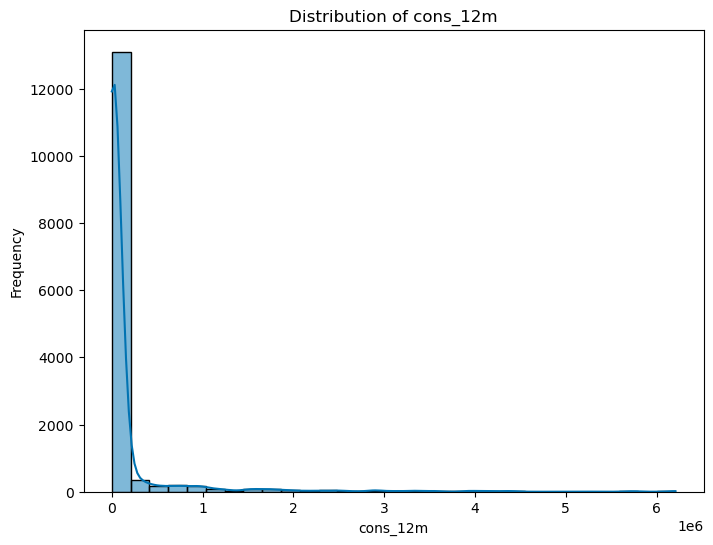

In [26]:
# Set the color palette globally to be colorblind-friendly
sns.set_palette("colorblind")

plt.figure(figsize=(8, 6))
sns.histplot(df['cons_12m'], kde=True, bins=30)
plt.title('Distribution of cons_12m')
plt.xlabel('cons_12m')
plt.ylabel('Frequency')
plt.show()

The plot shows the distribution of cons_12m (annual consumption), which is right-skewed. Most customers have low consumption, with a few outliers having very high values. This suggests that the data has a long tail towards the higher end, and a log transformation could help normalize it.

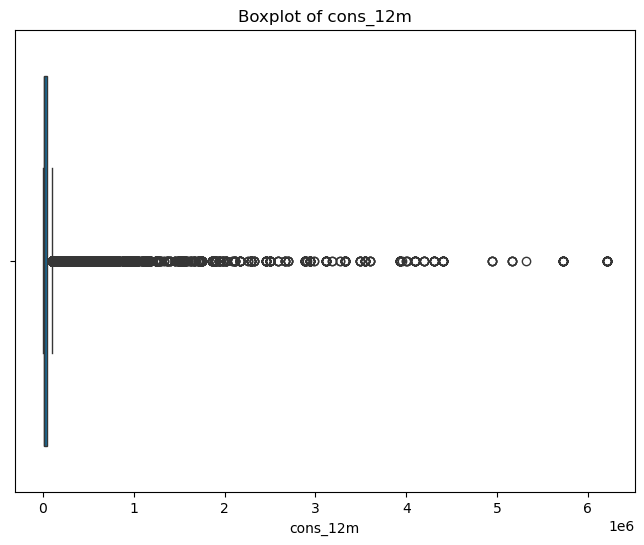

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['cons_12m'])
plt.title('Boxplot of cons_12m')
plt.xlabel('cons_12m')
plt.show()

The boxplot further confirms that cons_12m contains outliers on the higher end. These outliers indicate that there are a small number of customers with significantly higher consumption than the majority, which could potentially skew the analysis if not addressed.

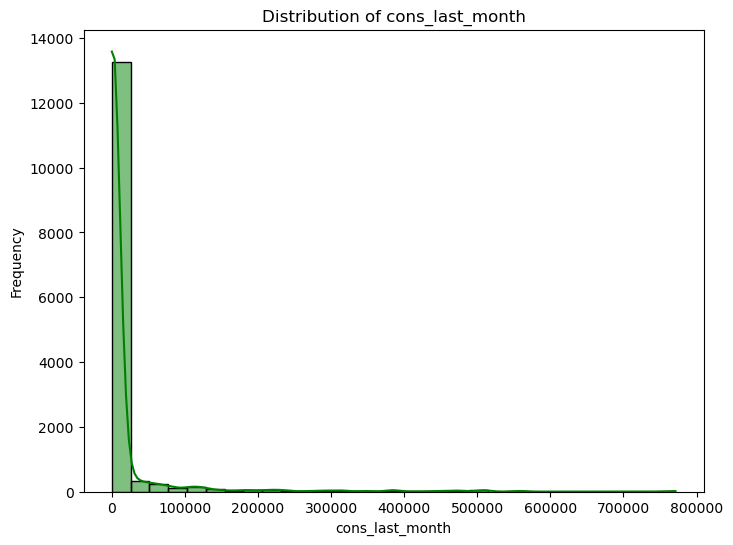

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df['cons_last_month'], kde=True, bins=30, color="green")
plt.title('Distribution of cons_last_month')
plt.xlabel('cons_last_month')
plt.ylabel('Frequency')
plt.show()

The histogram for cons_last_month is also right-skewed, with the majority of the consumption values clustered near 0. This indicates that most customers consume very little energy in the last month of the year, with a few customers having unusually high consumption.

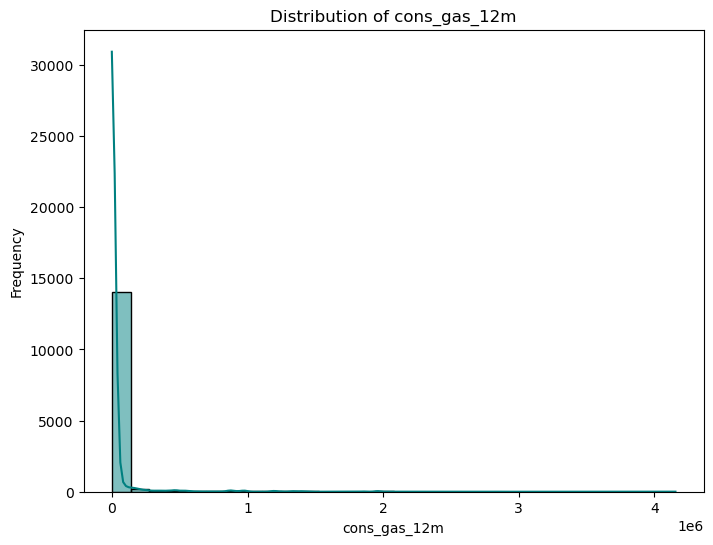

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['cons_gas_12m'], kde=True, bins=30, color="teal")
plt.title('Distribution of cons_gas_12m')
plt.xlabel('cons_gas_12m')
plt.ylabel('Frequency')
plt.show()

The distribution of cons_gas_12m is similar to cons_12m, with a heavy right skew. This indicates that the majority of customers have low gas consumption, but there are a few outliers with significantly higher gas usage.

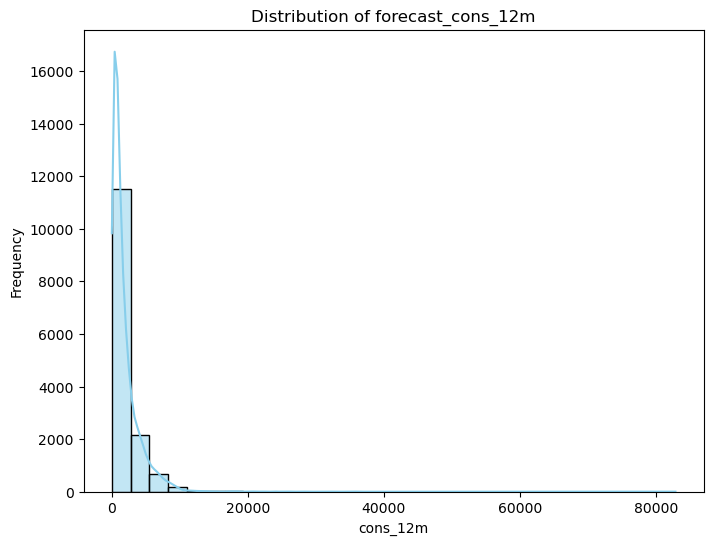

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['forecast_cons_12m'], kde=True, bins=30, color="skyblue")
plt.title('Distribution of forecast_cons_12m')
plt.xlabel('cons_12m')
plt.ylabel('Frequency')
plt.show()

The plot for forecast_cons_12m (forecasted consumption) also displays a right-skewed distribution. Similar to cons_12m, most forecast values are clustered near 0, while there are a few extreme outliers with very high forecasted consumption.

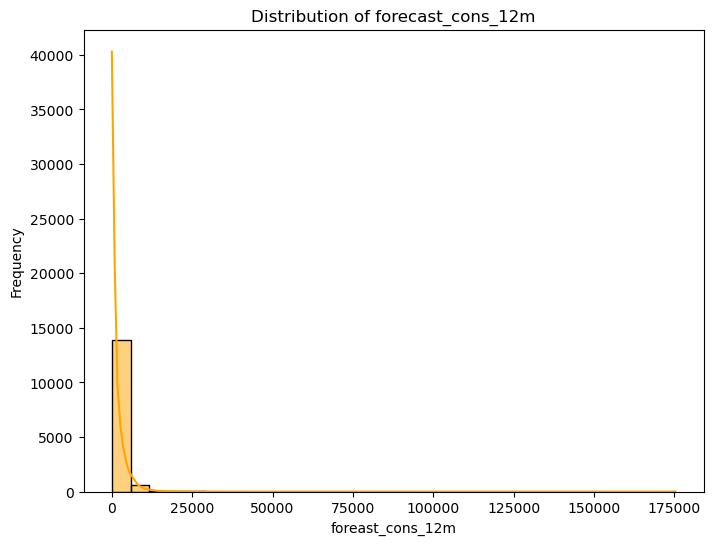

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['forecast_cons_year'], kde=True, bins=30, color="orange")
plt.title('Distribution of forecast_cons_12m')
plt.xlabel('foreast_cons_12m')
plt.ylabel('Frequency')
plt.show()

The distribution of forecast_discount_energy shows that most of the data is concentrated around low values. There’s a significant number of customers with very low or zero forecasted energy discounts, with a few extreme outliers. This suggests that a log transformation could help normalize this variable as well.

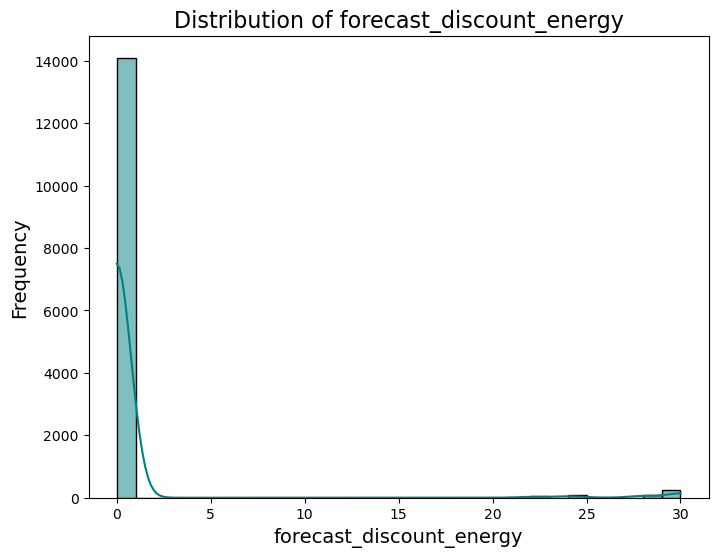

In [17]:
# Plot histogram for 'forecast_discount_energy'
plt.figure(figsize=(8, 6))
sns.histplot(df['forecast_discount_energy'], kde=True, bins=30, color="teal")
plt.title('Distribution of forecast_discount_energy', fontsize=16)
plt.xlabel('forecast_discount_energy', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


The distribution of forecast_meter_rent_12m shows a right-skewed distribution, with a high frequency of customers paying low meter rents. A few customers have higher meter rents, which is consistent with the other variables.

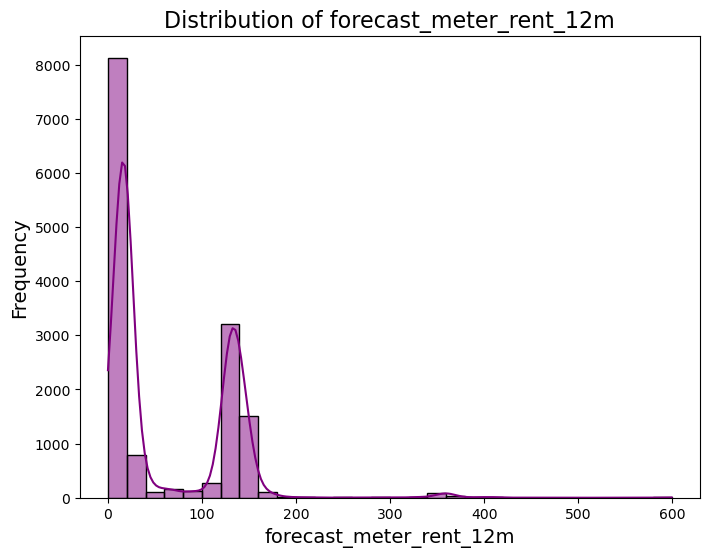

In [18]:
# Plot for 'forecast_meter_rent_12m'
plt.figure(figsize=(8, 6))
sns.histplot(df['forecast_meter_rent_12m'], kde=True, bins=30, color="purple")
plt.title('Distribution of forecast_meter_rent_12m', fontsize=16)
plt.xlabel('forecast_meter_rent_12m', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

The distribution of forecast_price_energy_off_peak is highly skewed, with a few price levels concentrated around 0. A log transformation could be applied here to adjust the high concentration of lower values and bring the distribution closer to normal.

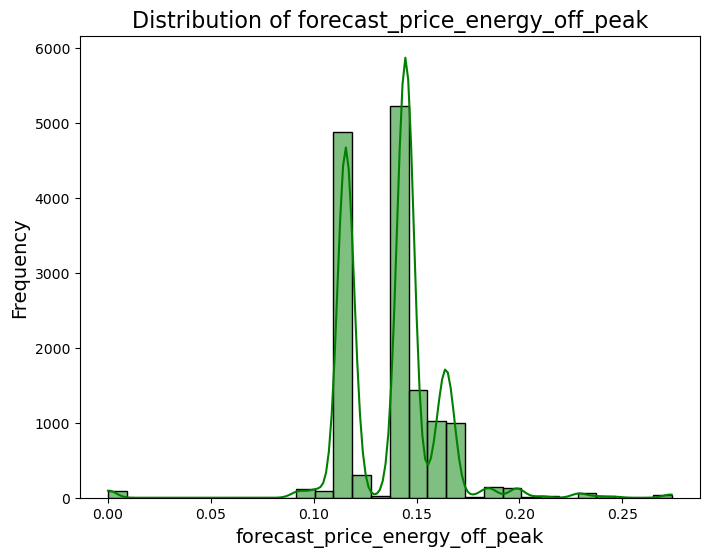

In [19]:
# Plot for 'forecast_price_energy_off_peak'
plt.figure(figsize=(8, 6))
sns.histplot(df['forecast_price_energy_off_peak'], kde=True, bins=30, color="green")
plt.title('Distribution of forecast_price_energy_off_peak', fontsize=16)
plt.xlabel('forecast_price_energy_off_peak', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

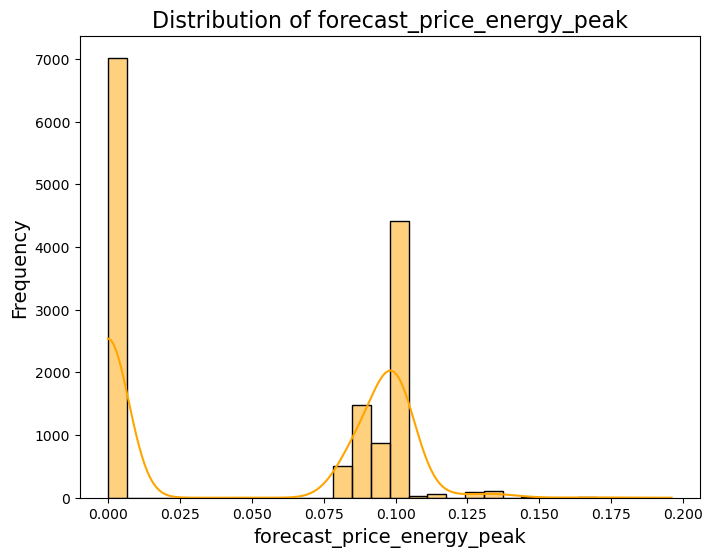

In [20]:
# Plot for 'forecast_price_energy_peak'
plt.figure(figsize=(8, 6))
sns.histplot(df['forecast_price_energy_peak'], kde=True, bins=30, color="orange")
plt.title('Distribution of forecast_price_energy_peak', fontsize=16)
plt.xlabel('forecast_price_energy_peak', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

Similar to the off-peak price, the forecast price for energy during peak times also exhibits a right-skewed distribution. Most customers are likely charged at the lower price range, with a few customers receiving much higher charges for peak hours.

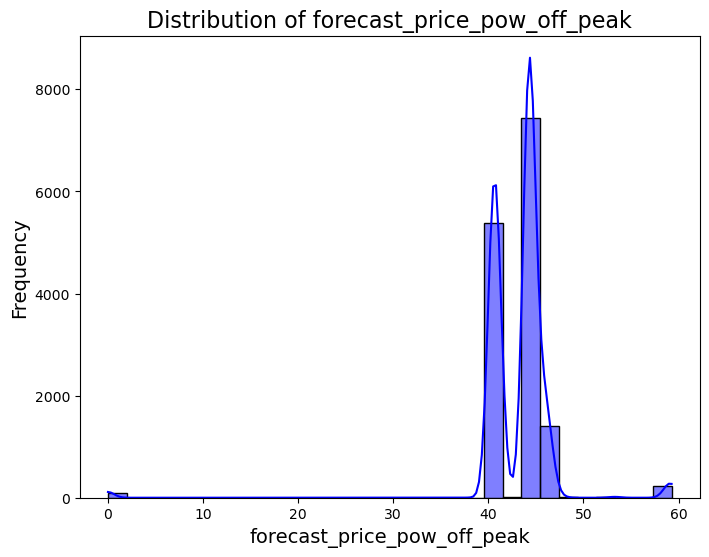

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(df['forecast_price_pow_off_peak'], kde=True, bins=30, color="blue")
plt.title('Distribution of forecast_price_pow_off_peak', fontsize=16)
plt.xlabel('forecast_price_pow_off_peak', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

This plot shows the right-skewed distribution of the forecasted price for off-peak power. The majority of data points are clustered at lower values, with a few extreme values on the higher end. This suggests that most customers pay a low forecasted price for off-peak power, but some pay significantly higher amounts.

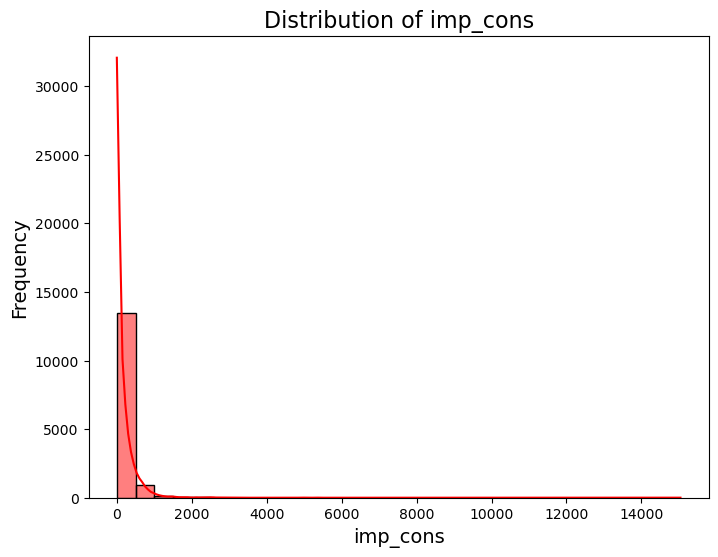

In [22]:
# Plot for 'imp_cons'
plt.figure(figsize=(8, 6))
sns.histplot(df['imp_cons'], kde=True, bins=30, color="red")
plt.title('Distribution of imp_cons', fontsize=16)
plt.xlabel('imp_cons', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

The right-skewed nature of this distribution indicates that the vast majority of customers have low impacted consumption. A few outliers are observed with higher consumption values. These outliers might represent customers with unusual consumption behavior, which could skew predictive models.

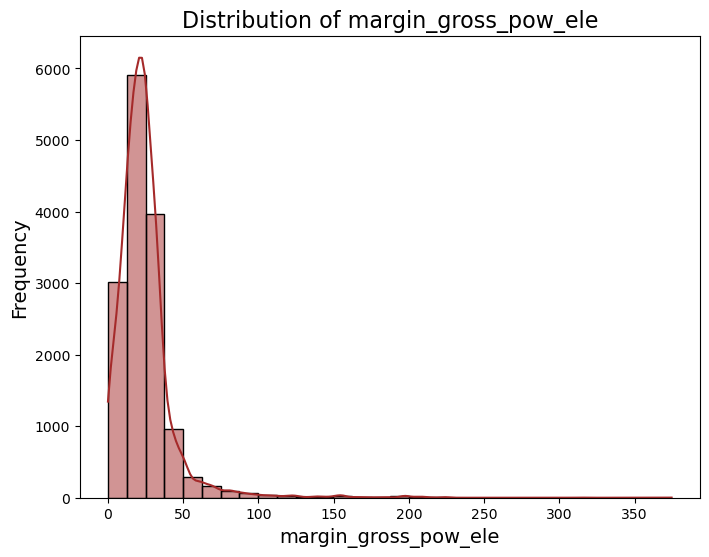

In [23]:
# Plot for 'margin_gross_pow_ele'
plt.figure(figsize=(8, 6))
sns.histplot(df['margin_gross_pow_ele'], kde=True, bins=30, color="brown")
plt.title('Distribution of margin_gross_pow_ele', fontsize=16)
plt.xlabel('margin_gross_pow_ele', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

The distribution of gross power margin is right-skewed, with most values being clustered around lower margin values. A few customers have higher margins, likely representing higher consumption or special pricing structures. These outliers could significantly affect the analysis if not handled properly.

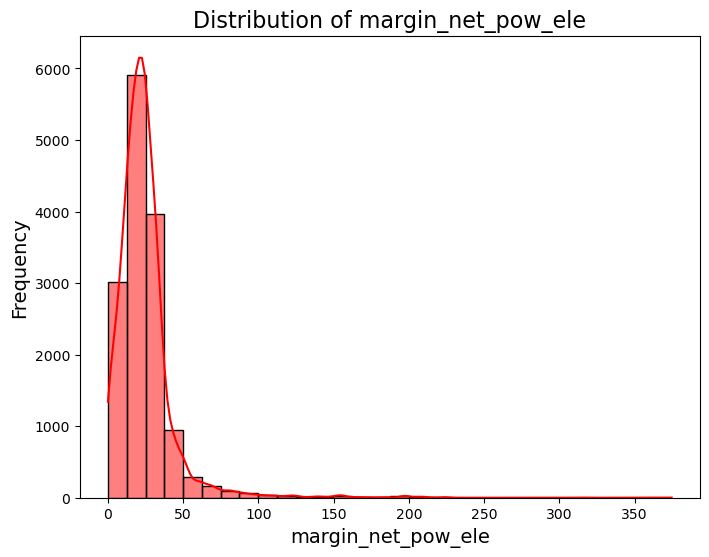

In [24]:
# Plot for 'margin_net_pow_ele'
plt.figure(figsize=(8, 6))
sns.histplot(df['margin_net_pow_ele'], kde=True, bins=30, color="red")
plt.title('Distribution of margin_net_pow_ele', fontsize=16)
plt.xlabel('margin_net_pow_ele', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

The distribution of net power margin shows a similar right-skewed pattern. Most customers have low net margins, while only a few have higher values. The spread suggests the presence of extreme outliers that could influence your analysis.

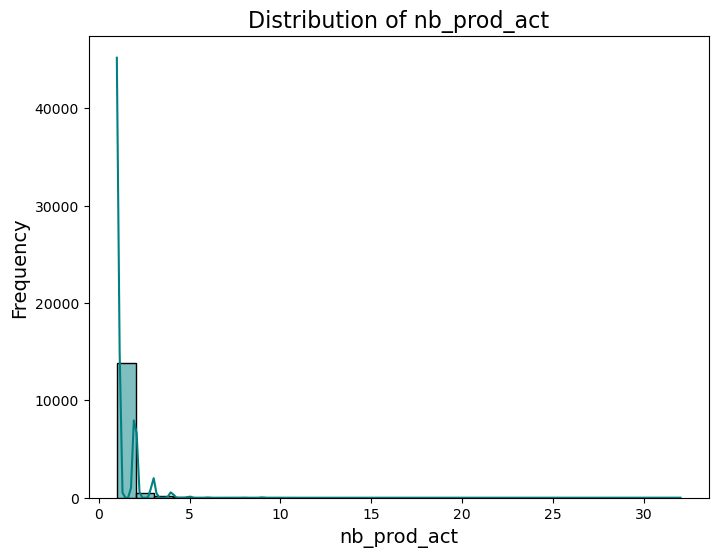

In [25]:
# Plot for 'nb_prod_act'
plt.figure(figsize=(8, 6))
sns.histplot(df['nb_prod_act'], kde=True, bins=30, color="teal")
plt.title('Distribution of nb_prod_act', fontsize=16)
plt.xlabel('nb_prod_act', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

The skewness of the distribution for number of active products is indicative of most customers having only a few active products, while a small number of customers have a significantly higher number of active products. This might require transforming the data for better normalization.

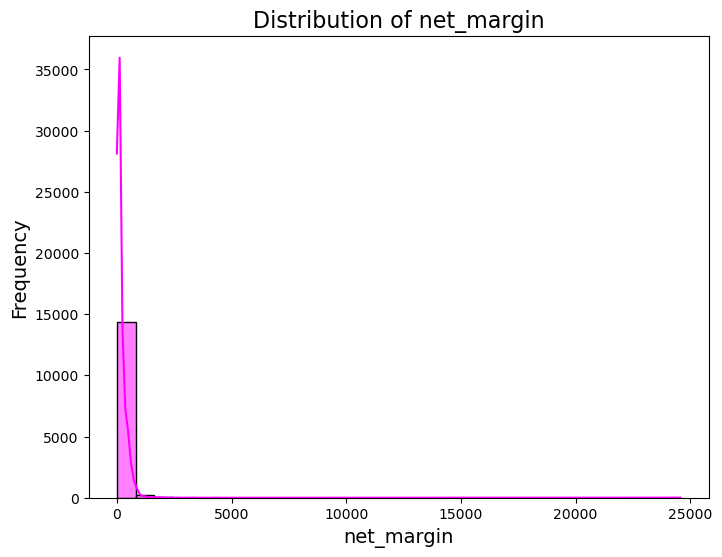

In [26]:
# Plot for 'net_margin'
plt.figure(figsize=(8, 6))
sns.histplot(df['net_margin'], kde=True, bins=30, color="magenta")
plt.title('Distribution of net_margin', fontsize=16)
plt.xlabel('net_margin', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

The right-skewed distribution of net margin shows that most customers have low margins, with only a few exceptions having unusually high margins. These outliers could be important for pricing models or risk assessments, but need to be handled carefully.

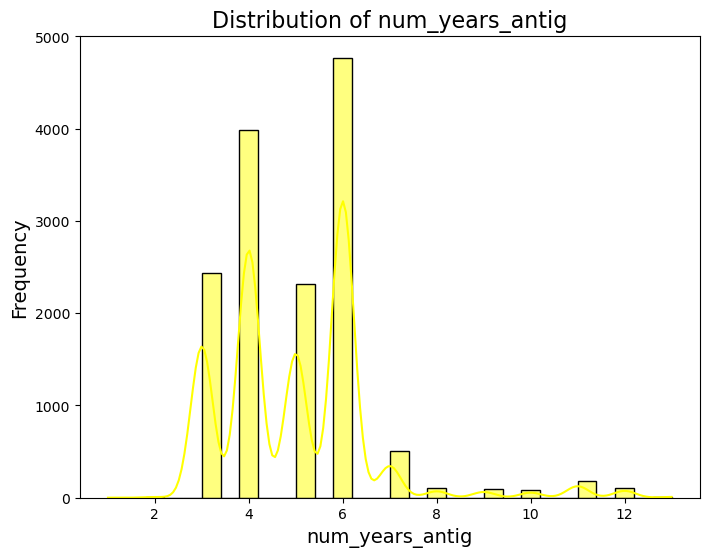

In [27]:
# Plot for 'num_years_antig'
plt.figure(figsize=(8, 6))
sns.histplot(df['num_years_antig'], kde=True, bins=30, color="yellow")
plt.title('Distribution of num_years_antig', fontsize=16)
plt.xlabel('num_years_antig', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

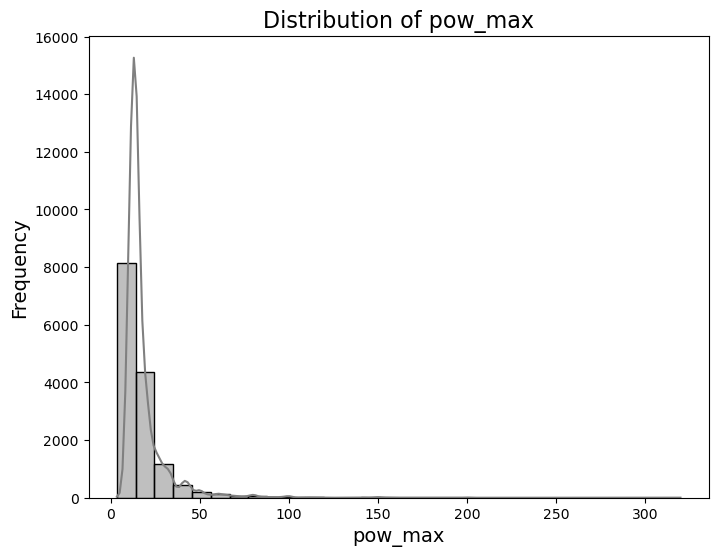

In [28]:
# Plot for 'pow_max'
plt.figure(figsize=(8, 6))
sns.histplot(df['pow_max'], kde=True, bins=30, color="gray")
plt.title('Distribution of pow_max', fontsize=16)
plt.xlabel('pow_max', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

The distribution of maximum power usage shows that most values are concentrated in the lower range, but a few extreme values exist on the higher end. This right-skewed pattern suggests that a log transformation could help normalize this feature.

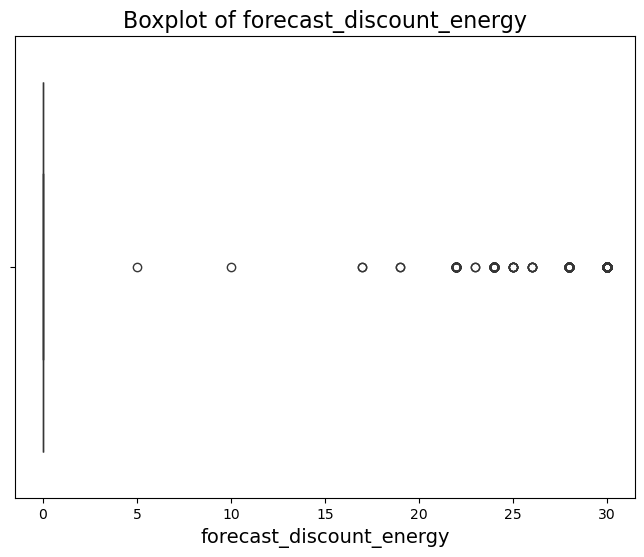

In [29]:
# Plot boxplot for 'forecast_discount_energy'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['forecast_discount_energy'])
plt.title('Boxplot of forecast_discount_energy', fontsize=16)
plt.xlabel('forecast_discount_energy', fontsize=14)
plt.show()

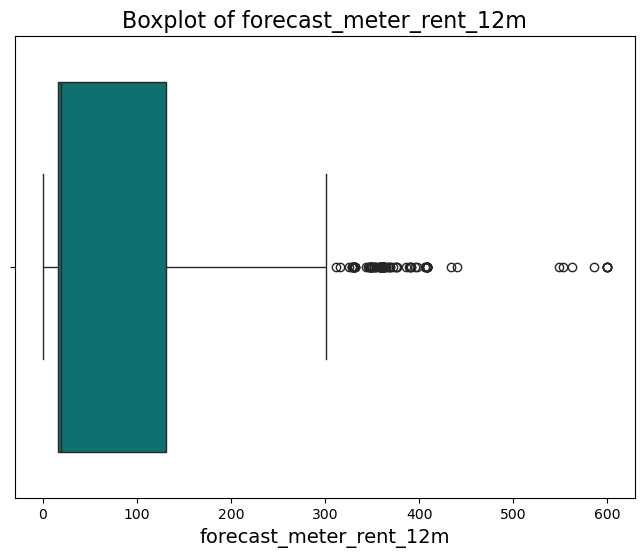

In [30]:
# Plot boxplot for 'forecast_meter_rent_12m'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['forecast_meter_rent_12m'],color="teal")
plt.title('Boxplot of forecast_meter_rent_12m', fontsize=16)
plt.xlabel('forecast_meter_rent_12m', fontsize=14)
plt.show()

The boxplot of forecast_meter_rent_12m shows a wide spread of values with a significant number of outliers. This indicates that there are a few customers with much higher meter rents compared to the rest. These outliers may need to be investigated further for any data issues or special cases that need to be handled separately.

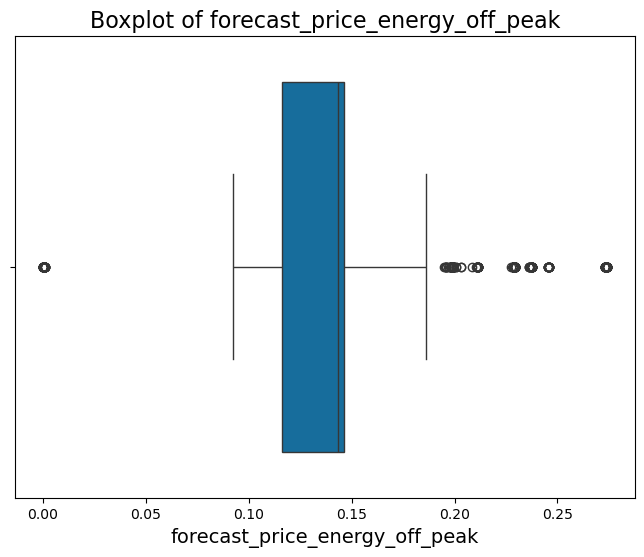

In [31]:
# Plot boxplot for 'forecast_price_energy_off_peak'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['forecast_price_energy_off_peak'])
plt.title('Boxplot of forecast_price_energy_off_peak', fontsize=16)
plt.xlabel('forecast_price_energy_off_peak', fontsize=14)
plt.show()

This boxplot shows the distribution of energy prices during off-peak hours. The boxplot indicates that most values are concentrated around the middle of the distribution, with a few outliers beyond the upper whisker, which represents the price higher than typical levels.

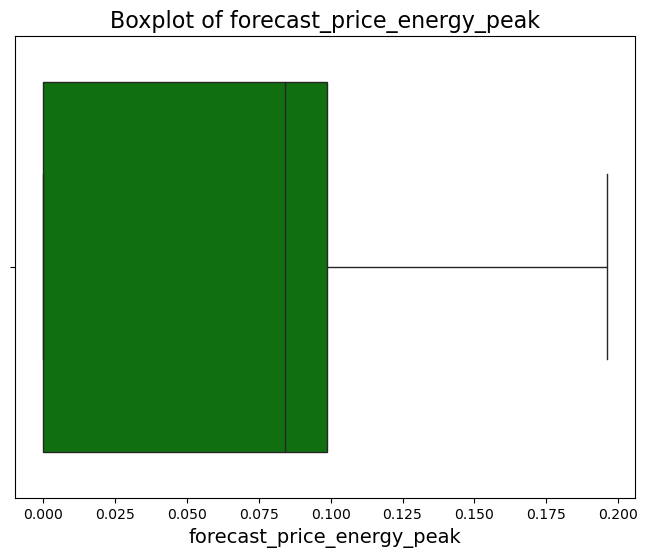

In [32]:
# Plot boxplot for 'forecast_price_energy_peak'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['forecast_price_energy_peak'],color="green")
plt.title('Boxplot of forecast_price_energy_peak', fontsize=16)
plt.xlabel('forecast_price_energy_peak', fontsize=14)
plt.show()

This boxplot shows the distribution of energy prices during peak hours. The plot suggests that most values are centered tightly within a narrow range. There are fewer extreme outliers compared to off-peak prices, with the values being more uniformly distributed within the box, indicating lower variability in peak pricing.

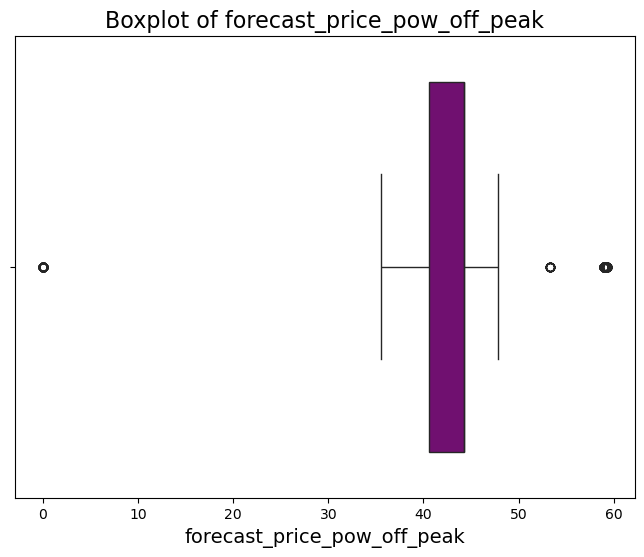

In [33]:
# Plot boxplot for 'forecast_price_pow_off_peak'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['forecast_price_pow_off_peak'],color="purple")
plt.title('Boxplot of forecast_price_pow_off_peak', fontsize=16)
plt.xlabel('forecast_price_pow_off_peak', fontsize=14)
plt.show()

The boxplot for off-peak power prices shows a similar concentration as the forecasted energy prices, with a few notable outliers extending beyond the whiskers. These outliers could represent rare instances of extremely high power prices during off-peak hours.

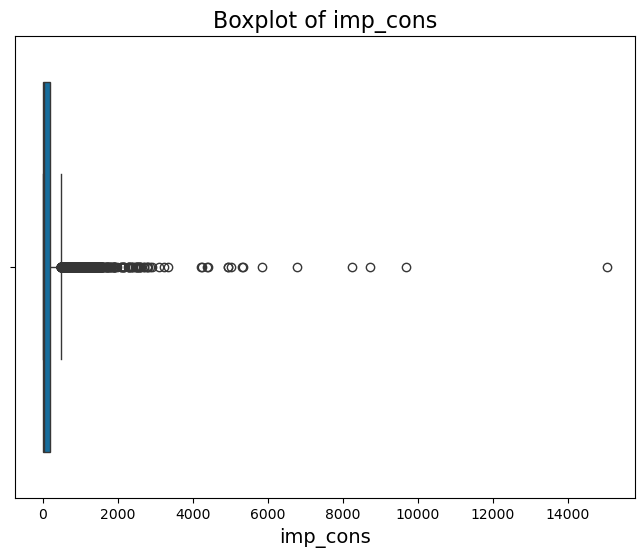

In [34]:
# Plot boxplot for 'imp_cons'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['imp_cons'])
plt.title('Boxplot of imp_cons', fontsize=16)
plt.xlabel('imp_cons', fontsize=14)
plt.show()

This boxplot reflects the distribution of imp_cons (presumably representing consumption), where we can see a high concentration of values near zero and a long tail extending to the right. This suggests a lot of instances with very low consumption, with a few observations exhibiting large consumption values that could be considered outliers.

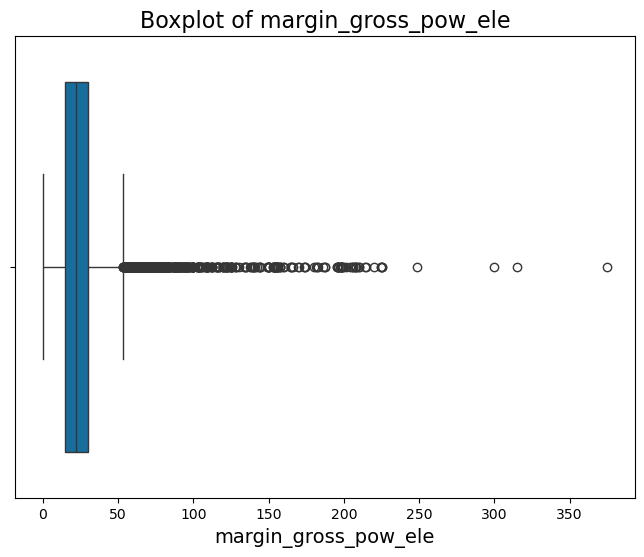

In [35]:
# Plot boxplot for 'margin_gross_pow_ele'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['margin_gross_pow_ele'])
plt.title('Boxplot of margin_gross_pow_ele', fontsize=16)
plt.xlabel('margin_gross_pow_ele', fontsize=14)
plt.show()

The boxplot for margin_gross_pow_ele (gross margin for power) reveals a concentration of data near zero, with a significant spread indicating variability in the gross margin. The few extreme values (outliers) suggest large deviations in gross power margins, which may be due to rare or unique events.

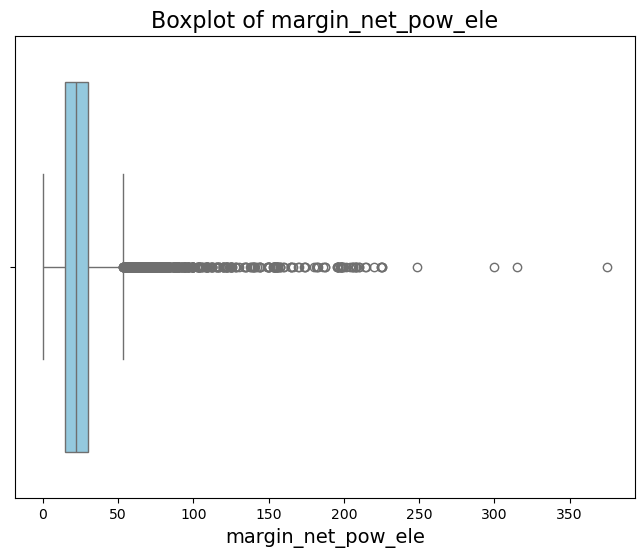

In [36]:
# Plot boxplot for 'margin_net_pow_ele'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['margin_net_pow_ele'],color="skyblue")
plt.title('Boxplot of margin_net_pow_ele', fontsize=16)
plt.xlabel('margin_net_pow_ele', fontsize=14)
plt.show()

This boxplot shows the distribution of net power margin. Similar to the gross margin, there is a high concentration near zero, but with significant outliers. These outliers could indicate certain customers with unusually high net margins.

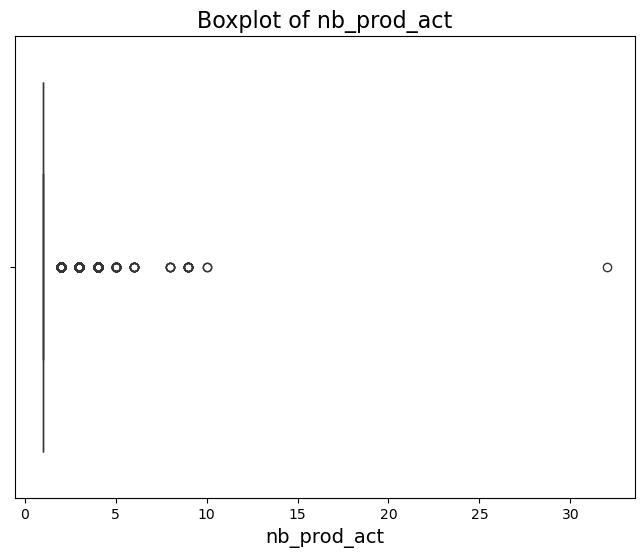

In [37]:
# Plot boxplot for 'nb_prod_act'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['nb_prod_act'])
plt.title('Boxplot of nb_prod_act', fontsize=16)
plt.xlabel('nb_prod_act', fontsize=14)
plt.show()

This boxplot shows the number of active products for the customers. Most of the customers seem to have fewer than five active products, but there are a few with significantly more active products, which are reflected as outliers.

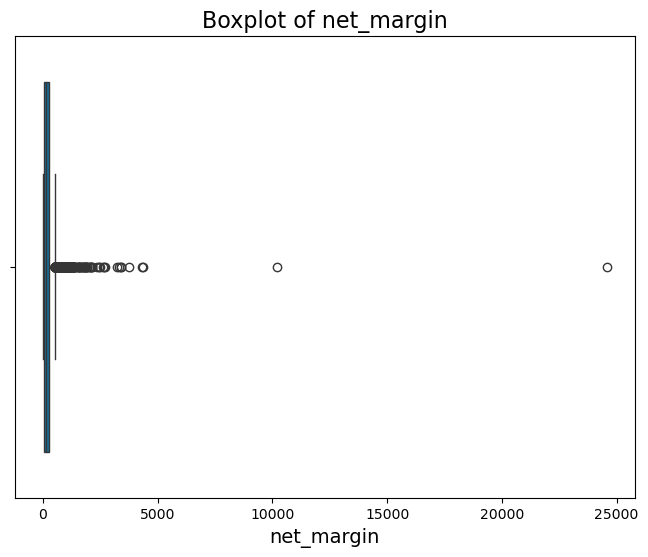

In [38]:
# Plot boxplot for 'net_margin'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['net_margin'])
plt.title('Boxplot of net_margin', fontsize=16)
plt.xlabel('net_margin', fontsize=14)
plt.show()

The boxplot of net margin indicates that most customers have low or near-zero margins. However, there are several outliers with very high net margins, suggesting that some customers might have exceptionally high profits.

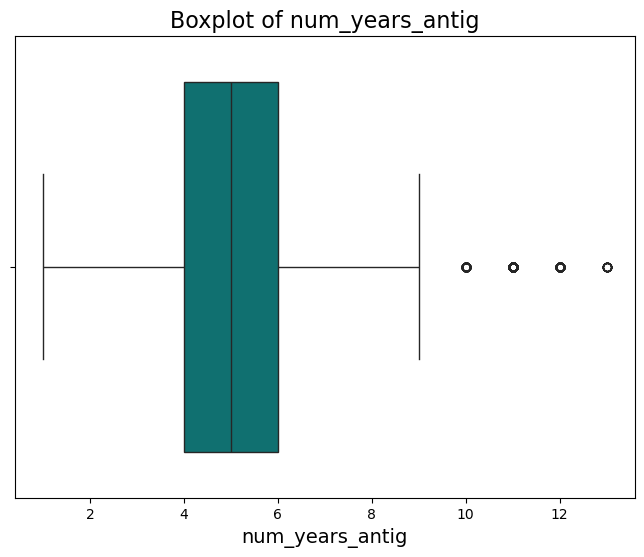

In [39]:
# Plot boxplot for 'num_years_antig'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['num_years_antig'],color="teal")
plt.title('Boxplot of num_years_antig', fontsize=16)
plt.xlabel('num_years_antig', fontsize=14)
plt.show()

This boxplot shows the number of years customers have been with the company. The data is concentrated between 3 and 7 years, with some outliers indicating customers who have been with the company for longer periods.

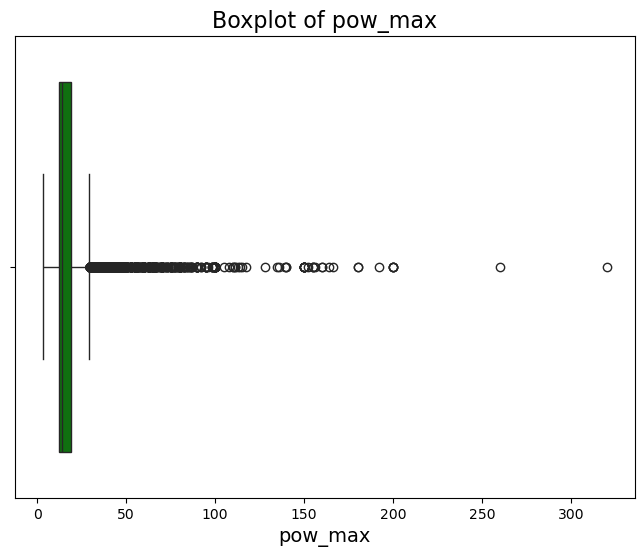

In [40]:
# Plot boxplot for 'pow_max'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['pow_max'],color="green")
plt.title('Boxplot of pow_max', fontsize=16)
plt.xlabel('pow_max', fontsize=14)
plt.show()

This boxplot displays the maximum power consumption values. There is a concentration of lower values, but a few outliers with extremely high power values are evident, showing that some customers have spikes in their maximum consumption.

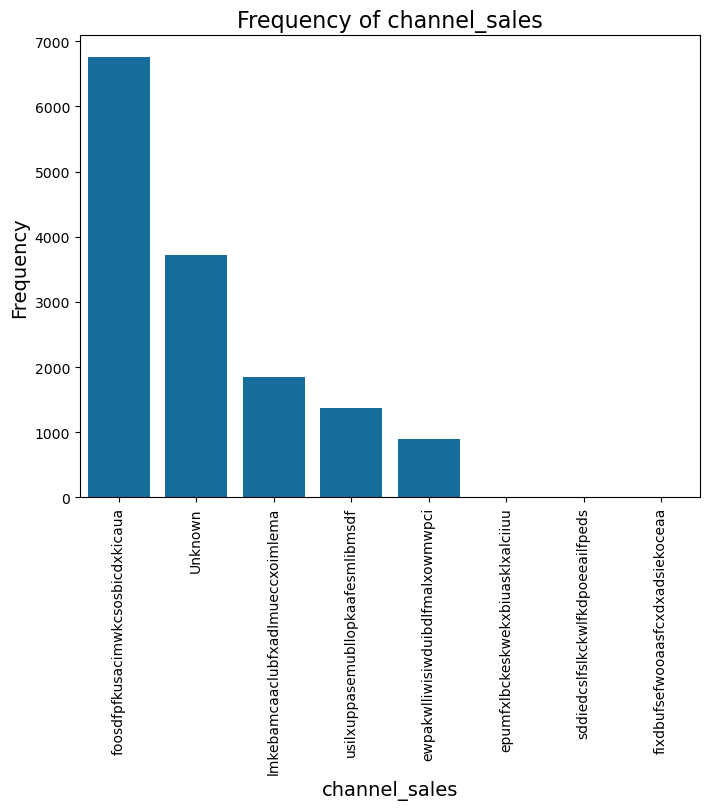

In [41]:
# Plot for 'channel_sales'
plt.figure(figsize=(8, 6))
sns.countplot(x=df['channel_sales'])
plt.title('Frequency of channel_sales', fontsize=16)
plt.xlabel('channel_sales', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90)
plt.show()

This bar plot shows the frequency distribution of different categories within the channel_sales feature. The categories such as foosdfpkusacimkwkcsosbcdxkciaua and Unknown appear frequently, while others appear less often.

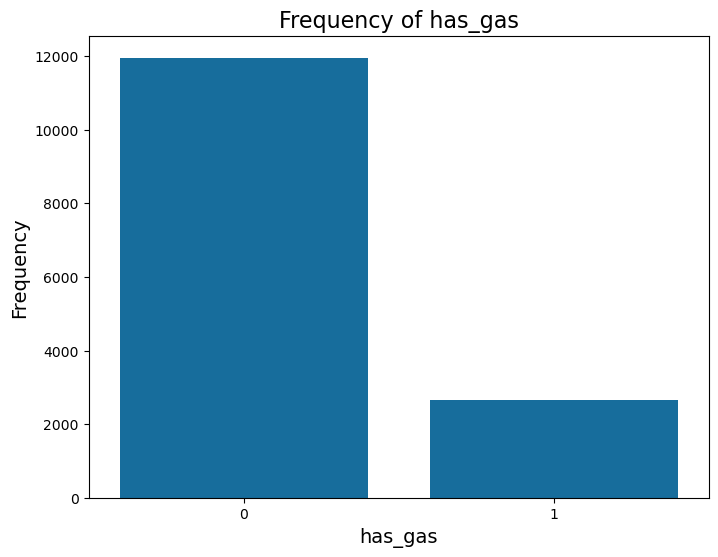

In [42]:
# Plot for 'has_gas'
plt.figure(figsize=(8, 6))
sns.countplot(x=df['has_gas'])
plt.title('Frequency of has_gas', fontsize=16)
plt.xlabel('has_gas', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

This bar plot represents the frequency of the has_gas feature, which is a binary variable (0 or 1). It shows that the majority of the data points have has_gas = 0, indicating that most of the customers or entries do not have gas.

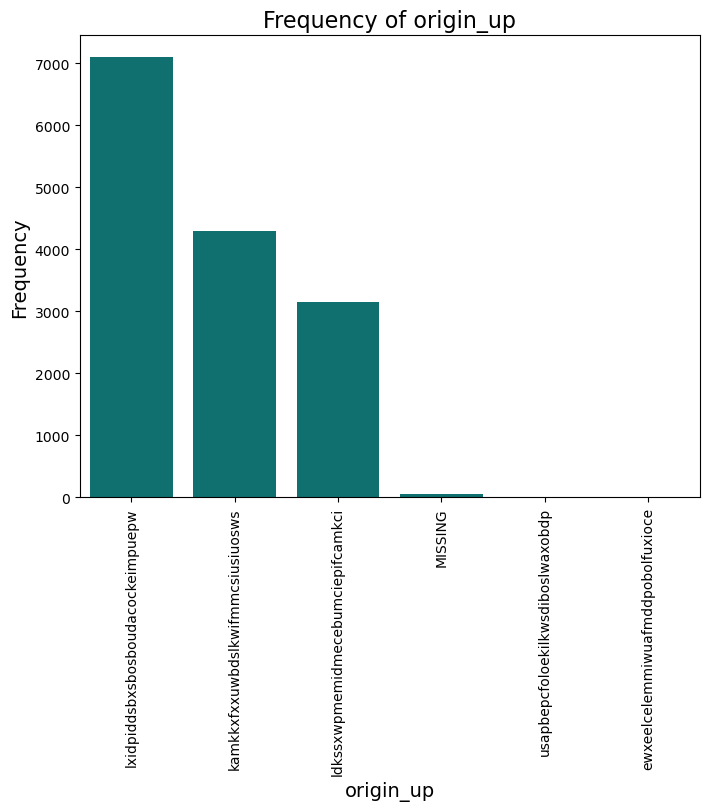

In [43]:
# Plot for 'origin_up'
plt.figure(figsize=(8, 6))
sns.countplot(x=df['origin_up'],color="teal")
plt.title('Frequency of origin_up', fontsize=16)
plt.xlabel('origin_up', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90)
plt.show()

This bar plot illustrates the frequency distribution of the origin_up feature. It shows that one category (kxdipiddsbxbsoboudacokeimupwp) dominates, while the others have lower frequencies.

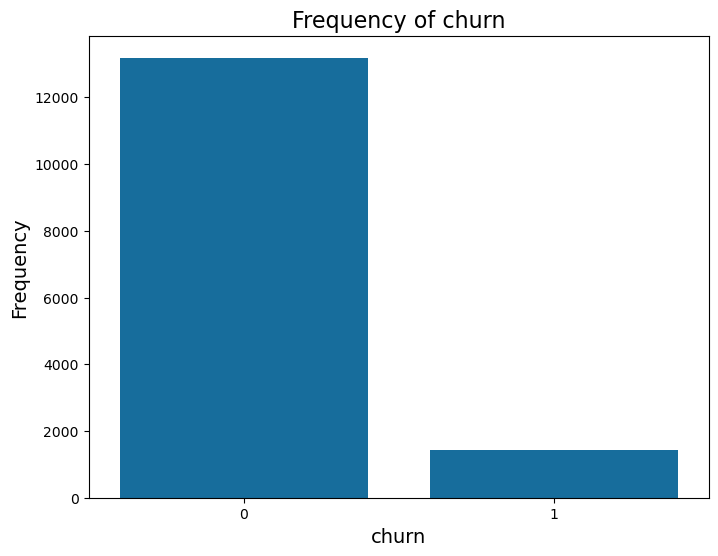

In [44]:
# Plot for 'churn'
plt.figure(figsize=(8, 6))
sns.countplot(x=df['churn'])
plt.title('Frequency of churn', fontsize=16)
plt.xlabel('churn', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

This plot shows the frequency of churn (0 or 1). It reveals that the majority of customers have not churned (churn = 0), with a small number having churned (churn = 1).

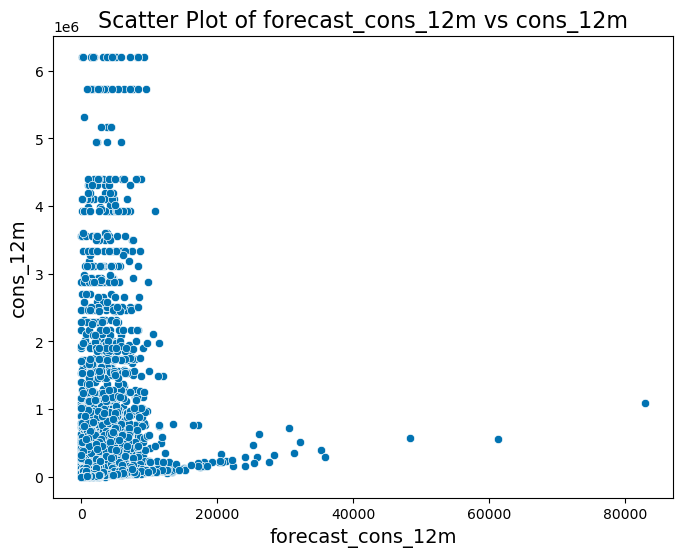

In [45]:
# Plotting scatter plot for forecast_cons_12m vs cons_12m
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['forecast_cons_12m'], y=df['cons_12m'])
plt.title('Scatter Plot of forecast_cons_12m vs cons_12m', fontsize=16)
plt.xlabel('forecast_cons_12m', fontsize=14)
plt.ylabel('cons_12m', fontsize=14)
plt.show()

This scatter plot shows the relationship between forecast_cons_12m and cons_12m. The x-axis represents forecast_cons_12m, while the y-axis represents cons_12m.  There's a strong clustering around low values, and a few high values suggest outliers. This might indicate a poor prediction of forecast_cons_12m for high consumption, or the need for further data preprocessing to handle extreme values.

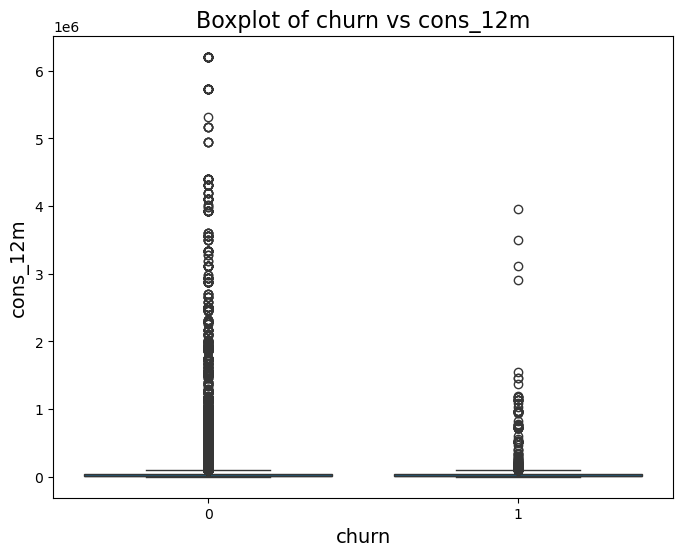

In [46]:
# Boxplot for 'churn' (categorical) vs 'cons_12m' (numerical)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['churn'], y=df['cons_12m'])
plt.title('Boxplot of churn vs cons_12m', fontsize=16)
plt.xlabel('churn', fontsize=14)
plt.ylabel('cons_12m', fontsize=14)
plt.show()

Customers who churned (churn = 1) have lower consumption on average compared to non-churning customers (churn = 0), suggesting that churn correlate with lower consumption. 

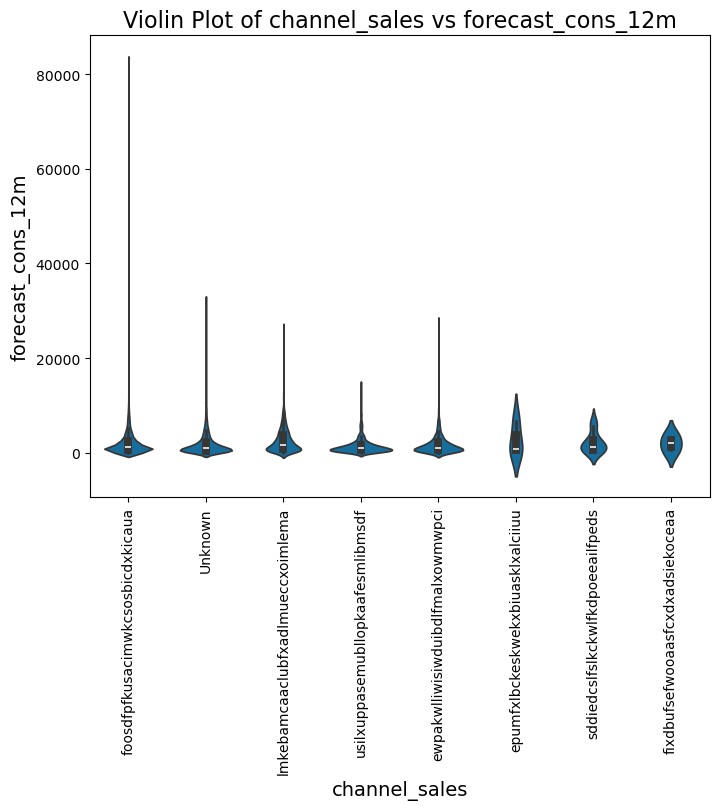

In [47]:
# Violin plot for 'channel_sales' (categorical) vs 'forecast_cons_12m' (numerical)
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['channel_sales'], y=df['forecast_cons_12m'])
plt.title('Violin Plot of channel_sales vs forecast_cons_12m', fontsize=16)
plt.xlabel('channel_sales', fontsize=14)
plt.ylabel('forecast_cons_12m', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels if they are too long
plt.show()

This violin plot displays the distribution of forecast_cons_12m across different categories of channel_sales. It provides both the distribution and the density of the variable for each category. Certain channel_sales categories (e.g., foosdfpkusacimkwkcsosbcdxkciaua) have high variability in forecast_cons_12m, while others have relatively narrow distributions. This suggests that consumption predictions vary significantly across channels.

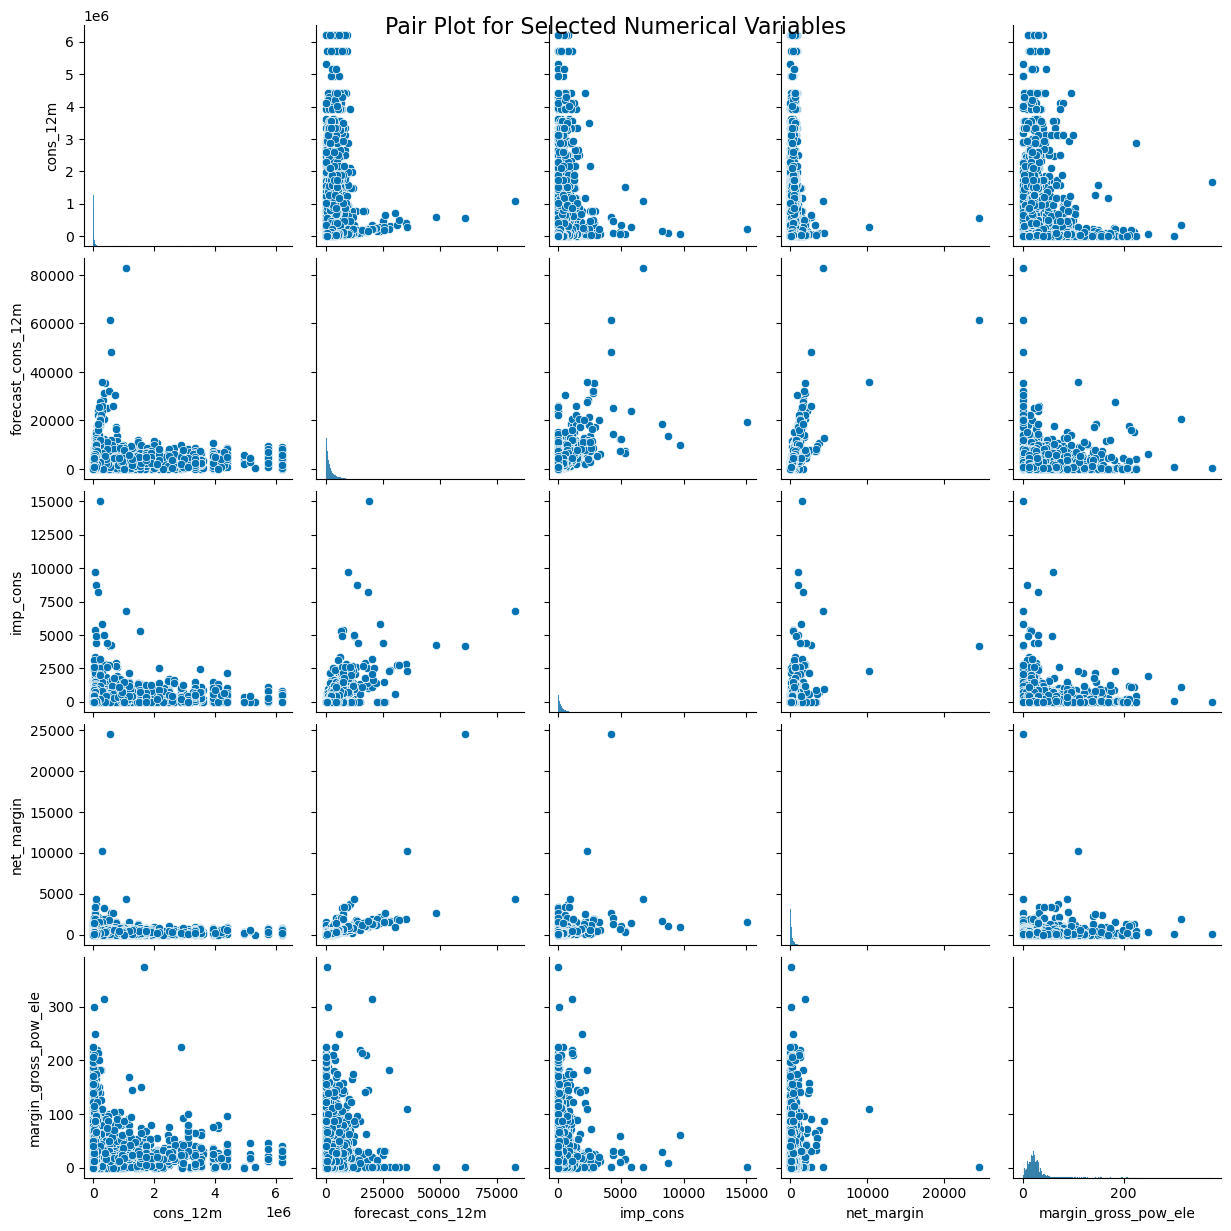

In [48]:
# Pair plot for a subset of numerical variables
sns.pairplot(df[['cons_12m', 'forecast_cons_12m', 'imp_cons', 'net_margin', 'margin_gross_pow_ele']])
plt.suptitle('Pair Plot for Selected Numerical Variables', fontsize=16)
plt.show()

This pair plot visualizes the relationships between multiple numerical variables (e.g., cons_12m, forecast_cons_12m, imp_cons, etc.) in the dataset. The diagonal shows the individual distributions of these variables, while the off-diagonal shows scatter plots of variable pairings. This plot highlights the relationships between variables, such as cons_12m and forecast_cons_12m being positively correlated. However, it also shows a lot of noise, as some variables appear uncorrelated, indicating potential opportunities for feature selection or engineering.

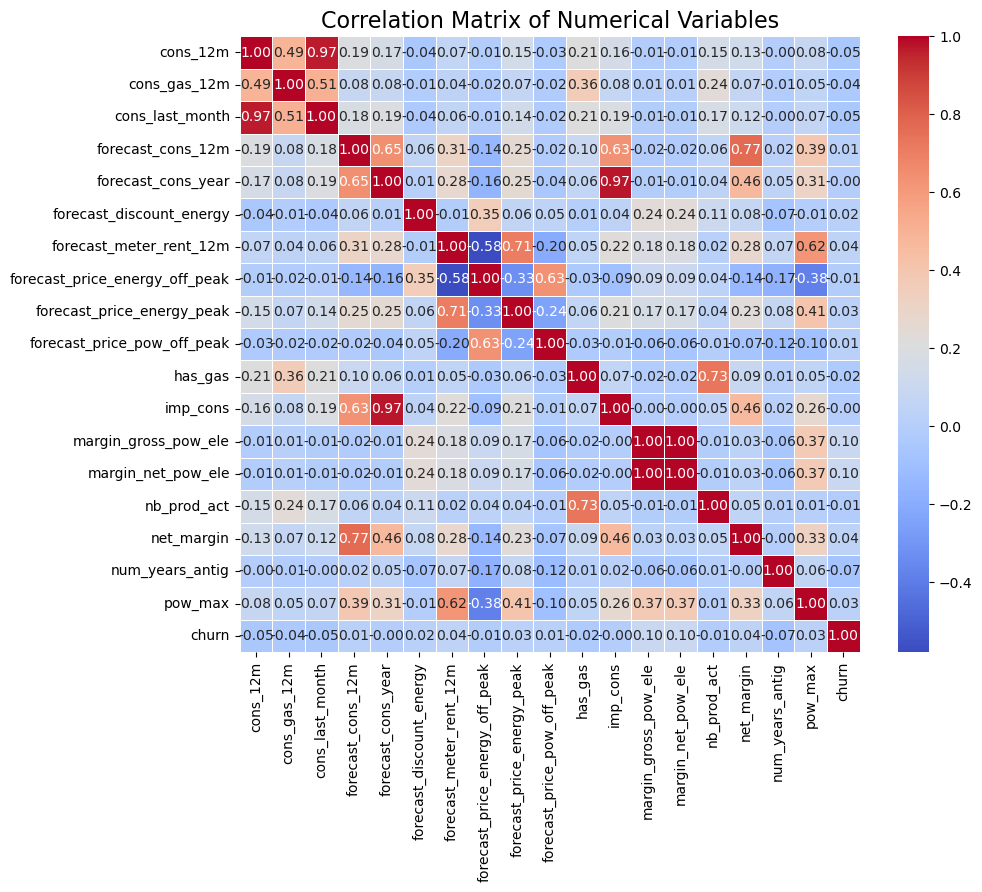

In [49]:
# Select only numeric columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.show()

Variables like imp_cons and forecast_cons_12m are also highly correlated, suggesting redundancy or multicollinearity.

## Considering the Price Data

In [28]:
df_1.head()

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [29]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [30]:
df_1['price_date'] = pd.to_datetime(df_1['price_date'])

In [31]:
# Check for duplicate rows
duplicates = df_1.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


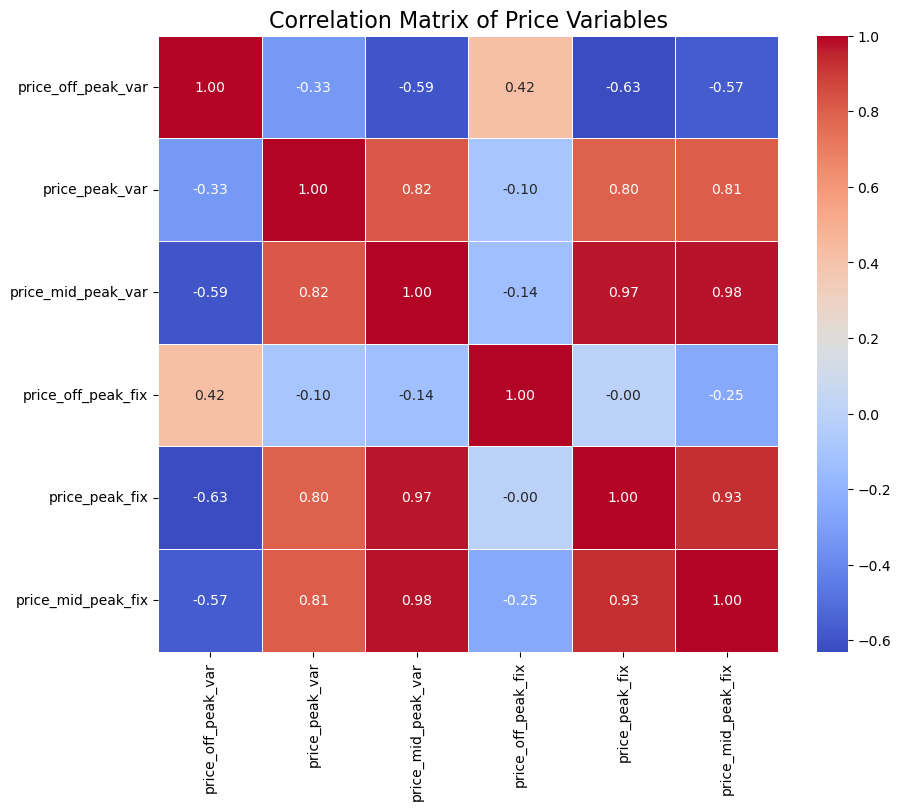

In [32]:
# Calculate the correlation matrix
correlation_matrix_price = df_1[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
                                       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_price, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix of Price Variables', fontsize=16)
plt.show()

Strong correlations between price_peak_var and price_mid_peak_var suggest that these pricing models move in tandem. Some negative correlations (e.g., between price_off_peak_var and price_peak_var) indicate that changes in one price might be inversely related to changes in another.

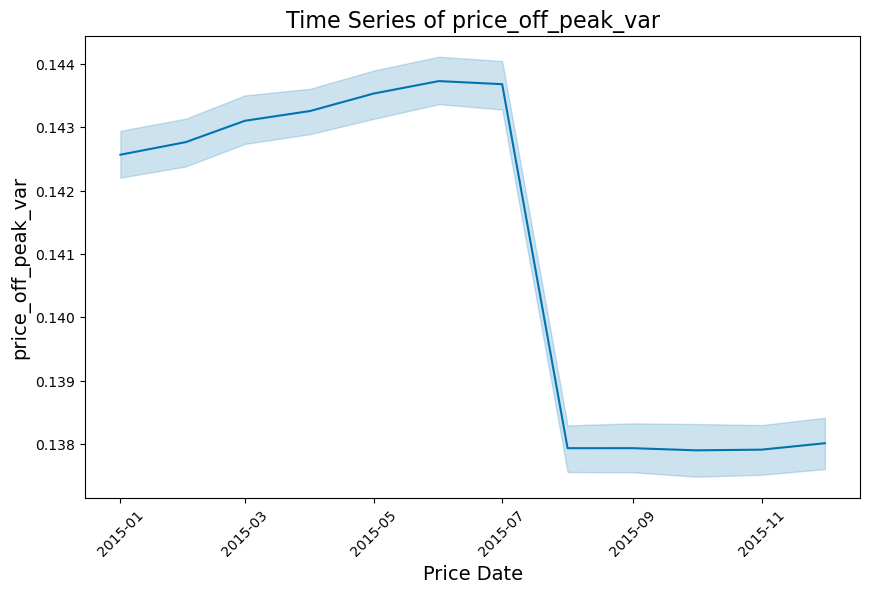

In [33]:
# Plotting time series for 'price_off_peak_var'
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_1['price_date'], y=df_1['price_off_peak_var'])
plt.title('Time Series of price_off_peak_var', fontsize=16)
plt.xlabel('Price Date', fontsize=14)
plt.ylabel('price_off_peak_var', fontsize=14)
plt.xticks(rotation=45)
plt.show()

This plot shows the trend of the variable price_off_peak_var over time (from 2015-01 to 2015-11). The line represents the central tendency (likely the mean), while the shaded region indicates the confidence interval, showing the variability or uncertainty in the data.

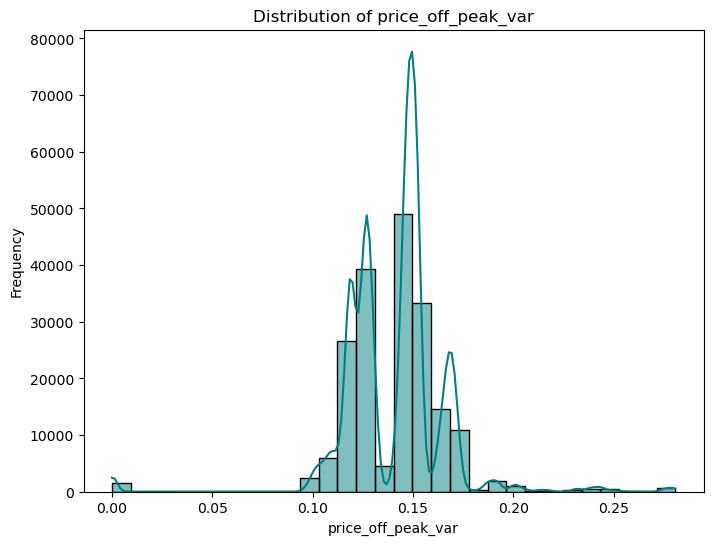

In [34]:
# Plot histogram and KDE for 'price_off_peak_var'
plt.figure(figsize=(8, 6))
sns.histplot(df_1['price_off_peak_var'], kde=True, bins=30, color="teal")
plt.title('Distribution of price_off_peak_var')
plt.xlabel('price_off_peak_var')
plt.ylabel('Frequency')
plt.show()

This plot visualizes the frequency distribution of price_off_peak_var. It combines a histogram (bars) and a Kernel Density Estimate (KDE) (smooth curve). Te distribution has several peaks, indicating that the values are clustered around certain ranges, with some outliers.

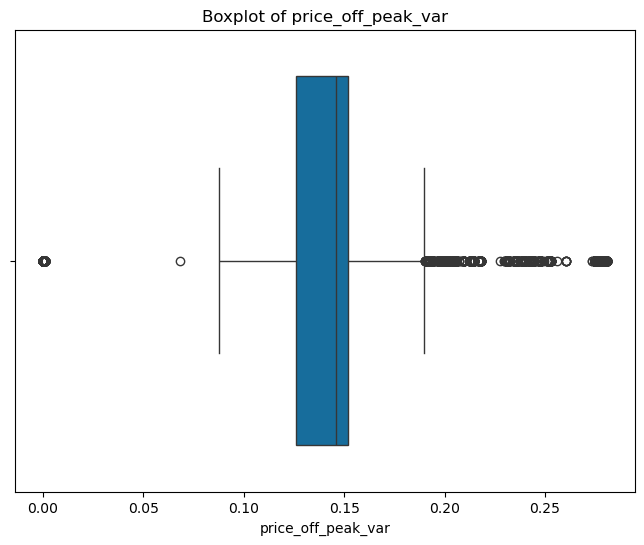

In [35]:
# Plot boxplot for 'price_off_peak_var'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_1['price_off_peak_var'])
plt.title('Boxplot of price_off_peak_var')
plt.xlabel('price_off_peak_var')
plt.show()

This boxplot displays the spread and central tendency of price_off_peak_var, with a focus on identifying outliers.
The boxplot shows that the data has a fairly wide spread, with multiple outliers at both ends. This could indicate irregular fluctuations in pricing or pricing errors in some instances.

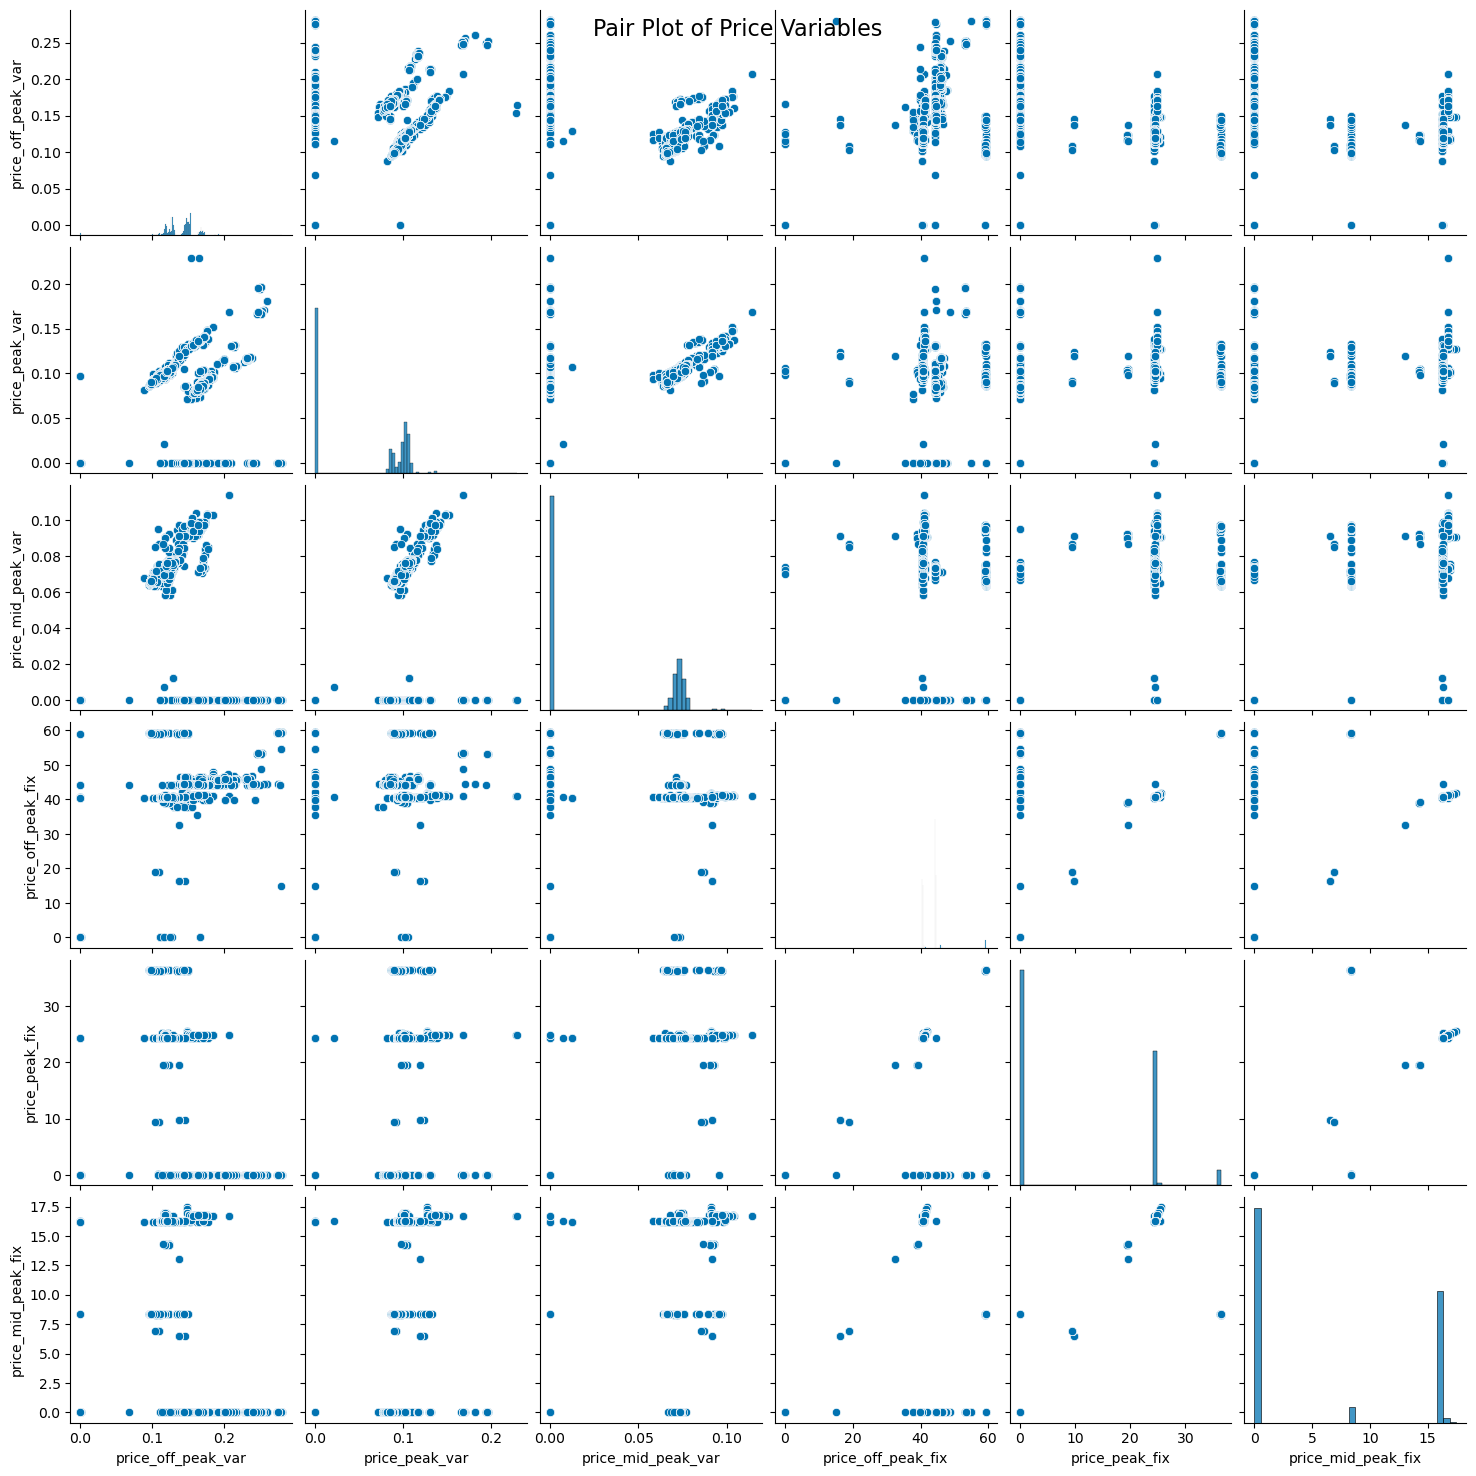

In [36]:
# Pair plot for price variables
sns.pairplot(df_1[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
                         'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']])
plt.suptitle('Pair Plot of Price Variables', fontsize=16)
plt.show()

A pair plot shows scatter plots for each pair of selected numerical price variables. It helps in exploring relationships between variables.
Some pairs, like price_off_peak_var and price_peak_var, show a linear relationship, while others display more scattered behavior, indicating weaker correlations or more variability in price.

In [37]:
# Merge the client and price data on the 'id' column
df = pd.merge(df, df_1, on='id', how='inner')


In [38]:
# Check the first few rows of the merged data
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
3  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
4  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1         0         54946                0 2013-06-15 2016-06-15   
2         0         54946                0 2013-06-15 2016-06-15   
3         0         54946                0 2013-06-15 2016-06-15   
4         0         54946                0 2013-06-15 2016-06-15   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23                0.0  ...   
1      2015-11-01   2015-06-23                0.0  ...   
2      2015-11-01   2015-06-23                0.0  ...   
3      2015-11-01   2015-06-23                0.0  ...   
4      2015-11-01   2015-06-23                0.0  ...   

                          origin_up  pow_max  churn  price_date  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  2015-01-01   
1  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  2015-02-01   
2  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  2015-03-01   
3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  2015-04-01   
4  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  2015-05-01   

   price_off_peak_var  price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0            0.125976        0.103395            0.071536           40.565969   
1            0.125976        0.103395            0.071536           40.565969   
2            0.125976        0.103395            0.071536           40.565973   
3            0.125976        0.103395            0.071536           40.565973   
4            0.125976        0.103395            0.071536           40.565973   

   price_peak_fix  price_mid_peak_fix  
0       24.339581           16.226389  
1       24.339581           16.226389  
2       24.339578           16.226383  
3       24.339578           16.226383  
4       24.339578           16.226383  

[5 rows x 33 columns]

In [39]:
# Check data types and null values after the merge
print(df.dtypes)

id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                    int64
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

In [40]:
print(df.isnull().sum())

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
price_date                        0
price_off_peak_var          

In [41]:
# Extract year, month, and day from the date columns
df['year_activ'] = df['date_activ'].dt.year
df['month_activ'] = df['date_activ'].dt.month
df['day_activ'] = df['date_activ'].dt.day

df['year_end'] = df['date_end'].dt.year
df['month_end'] = df['date_end'].dt.month
df['day_end'] = df['date_end'].dt.day

df['year_modif_prod'] = df['date_modif_prod'].dt.year
df['month_modif_prod'] = df['date_modif_prod'].dt.month
df['day_modif_prod'] = df['date_modif_prod'].dt.day

df['year_renewal'] = df['date_renewal'].dt.year
df['month_renewal'] = df['date_renewal'].dt.month
df['day_renewal'] = df['date_renewal'].dt.day

df['year_price_date'] = df['price_date'].dt.year
df['month_price_date'] = df['price_date'].dt.month
df['day_price_date'] = df['price_date'].dt.day

# Drop the original date columns
df = df.drop(columns=['date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'price_date'])

In [42]:
# Drop the 'id' column
df = df.drop(columns=['id'])

In [43]:
# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [45]:
# Apply log10 transformation to the remaining right-skewed variables
df["margin_gross_pow_ele"] = np.log10(df["margin_gross_pow_ele"] + 1)
df["margin_net_pow_ele"] = np.log10(df["margin_net_pow_ele"] + 1)
df["nb_prod_act"] = np.log10(df["nb_prod_act"] + 1)
df["net_margin"] = np.log10(df["net_margin"] + 1)
df["pow_max"] = np.log10(df["pow_max"] + 1)
df["forecast_price_energy_off_peak"] = np.log10(df["forecast_price_energy_off_peak"] + 1)
df["forecast_price_energy_peak"] = np.log10(df["forecast_price_energy_peak"] + 1)
df["forecast_price_pow_off_peak"] = np.log10(df["forecast_price_pow_off_peak"] + 1)
df["forecast_discount_energy"] = np.log10(df["forecast_discount_energy"] + 1)

In [46]:
# Check the summary statistics after transformation
df[[
    "cons_12m", "cons_gas_12m", "cons_last_month", "forecast_cons_12m",
    "forecast_cons_year", "forecast_meter_rent_12m", "imp_cons", "margin_gross_pow_ele",
    "margin_net_pow_ele", "nb_prod_act", "net_margin", "pow_max", "forecast_price_energy_off_peak",
    "forecast_price_energy_peak", "forecast_price_pow_off_peak", "forecast_discount_energy"
]].describe()

cons_12m   cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  175149.000000  175149.000000    175149.000000      175149.000000   
mean        4.223974       0.779107         2.264762           2.962138   
std         0.884530       1.716895         1.769263           0.683576   
min         0.000000       0.000000         0.000000           0.000000   
25%         3.753966       0.000000         0.000000           2.695464   
50%         4.149712       0.000000         2.899273           3.046733   
75%         4.610277       0.000000         3.529430           3.380455   
max         6.792889       6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_meter_rent_12m       imp_cons  \
count       175149.000000            175149.000000  175149.000000   
mean             1.784528                 1.517148       1.240693   
std              1.584941                 0.571421       1.138292   
min              0.000000                 0.000000       0.000000   
25%              0.000000                 1.235023       0.000000   
50%              2.498311                 1.296446       1.584218   
75%              3.242044                 2.120673       2.290012   
max              5.243970                 2.778376       4.177357   

       margin_gross_pow_ele  margin_net_pow_ele    nb_prod_act     net_margin  \
count         175149.000000       175149.000000  175149.000000  175149.000000   
mean               1.300033            1.299988       0.347565       2.009993   
std                0.340543            0.340536       0.095924       0.551755   
min                0.000000            0.000000       0.301030       0.000000   
25%                1.184123            1.184123       0.301030       1.713575   
50%                1.354876            1.354876       0.301030       2.054996   
75%                1.489677            1.489677       0.301030       2.387390   
max                2.574772            2.574772       1.518514       4.390434   

             pow_max  forecast_price_energy_off_peak  \
count  175149.000000                   175149.000000   
mean        1.231281                        0.055768   
std         0.182064                        0.009439   
min         0.633468                        0.000000   
25%         1.130334                        0.047796   
50%         1.171902                        0.058109   
75%         1.304921                        0.059316   
max         2.506505                        0.105157   

       forecast_price_energy_peak  forecast_price_pow_off_peak  \
count               175149.000000                175149.000000   
mean                     0.020917                     1.636054   
std                      0.020296                     0.134278   
min                      0.000000                     0.000000   
25%                      0.000000                     1.619163   
50%                      0.035085                     1.656207   
75%                      0.040933                     1.656207   
max                      0.077722                     1.780075   

       forecast_discount_energy  
count             175149.000000  
mean                   0.050928  
std                    0.267416  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    0.000000  
max                    1.491362

In [48]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0       0.0      4.739944              0.0                0.0   
1       0.0      4.739944              0.0                0.0   
2       0.0      4.739944              0.0                0.0   
3       0.0      4.739944              0.0                0.0   
4       0.0      4.739944              0.0                0.0   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                 0.0                       0.0                 0.444045   
1                 0.0                       0.0                 0.444045   
2                 0.0                       0.0                 0.444045   
3                 0.0                       0.0                 0.444045   
4                 0.0                       0.0                 0.444045   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.047073                    0.040659   
1                        0.047073                    0.040659   
2                        0.047073                    0.040659   
3                        0.047073                    0.040659   
4                        0.047073                    0.040659   

   forecast_price_pow_off_peak  ...  month_renewal  day_renewal  \
0                     1.619163  ...              6           23   
1                     1.619163  ...              6           23   
2                     1.619163  ...              6           23   
3                     1.619163  ...              6           23   
4                     1.619163  ...              6           23   

   year_price_date  month_price_date  day_price_date  channel_Unknown  \
0             2015                 1               1            False   
1             2015                 2               1            False   
2             2015                 3               1            False   
3             2015                 4               1            False   
4             2015                 5               1            False   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

  channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                     True   
1                                     True   
2                                     True   
3                                     True   
4                                     True   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                     False  
1                                     False  
2                                     False  
3                                     False  
4                                     False  

[5 rows x 46 columns]

In [49]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0       0.0      4.739944              0.0                0.0   
1       0.0      4.739944              0.0                0.0   
2       0.0      4.739944              0.0                0.0   
3       0.0      4.739944              0.0                0.0   
4       0.0      4.739944              0.0                0.0   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                 0.0                       0.0                 0.444045   
1                 0.0                       0.0                 0.444045   
2                 0.0                       0.0                 0.444045   
3                 0.0                       0.0                 0.444045   
4                 0.0                       0.0                 0.444045   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.047073                    0.040659   
1                        0.047073                    0.040659   
2                        0.047073                    0.040659   
3                        0.047073                    0.040659   
4                        0.047073                    0.040659   

   forecast_price_pow_off_peak  ...  month_price_date  day_price_date  \
0                     1.619163  ...                 1               1   
1                     1.619163  ...                 2               1   
2                     1.619163  ...                 3               1   
3                     1.619163  ...                 4               1   
4                     1.619163  ...                 5               1   

   channel_Unknown  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0            False                                     False   
1            False                                     False   
2            False                                     False   
3            False                                     False   
4            False                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                      True   
2                                      True   
3                                      True   
4                                      True   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                        True  
2                                        True  
3                                        True  
4                                        True  

[5 rows x 48 columns]

In [53]:
remove = ['year_price_date','day_price_date']

df = df.drop(columns=remove)
df.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0       0.0      4.739944              0.0                0.0   
1       0.0      4.739944              0.0                0.0   
2       0.0      4.739944              0.0                0.0   
3       0.0      4.739944              0.0                0.0   
4       0.0      4.739944              0.0                0.0   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                 0.0                       0.0                 0.444045   
1                 0.0                       0.0                 0.444045   
2                 0.0                       0.0                 0.444045   
3                 0.0                       0.0                 0.444045   
4                 0.0                       0.0                 0.444045   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.047073                    0.040659   
1                        0.047073                    0.040659   
2                        0.047073                    0.040659   
3                        0.047073                    0.040659   
4                        0.047073                    0.040659   

   forecast_price_pow_off_peak  ...  day_renewal  month_price_date  \
0                     1.619163  ...           23                 1   
1                     1.619163  ...           23                 2   
2                     1.619163  ...           23                 3   
3                     1.619163  ...           23                 4   
4                     1.619163  ...           23                 5   

   channel_Unknown  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0            False                                     False   
1            False                                     False   
2            False                                     False   
3            False                                     False   
4            False                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                      True   
2                                      True   
3                                      True   
4                                      True   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                        True  
2                                        True  
3                                        True  
4                                        True  

[5 rows x 46 columns]

Most of the variables that were originally right-skewed (i.e., with long tails) now exhibit a much more even distribution, with reduced skewness, as shown by the standard deviation and the median values being closer to the mean.

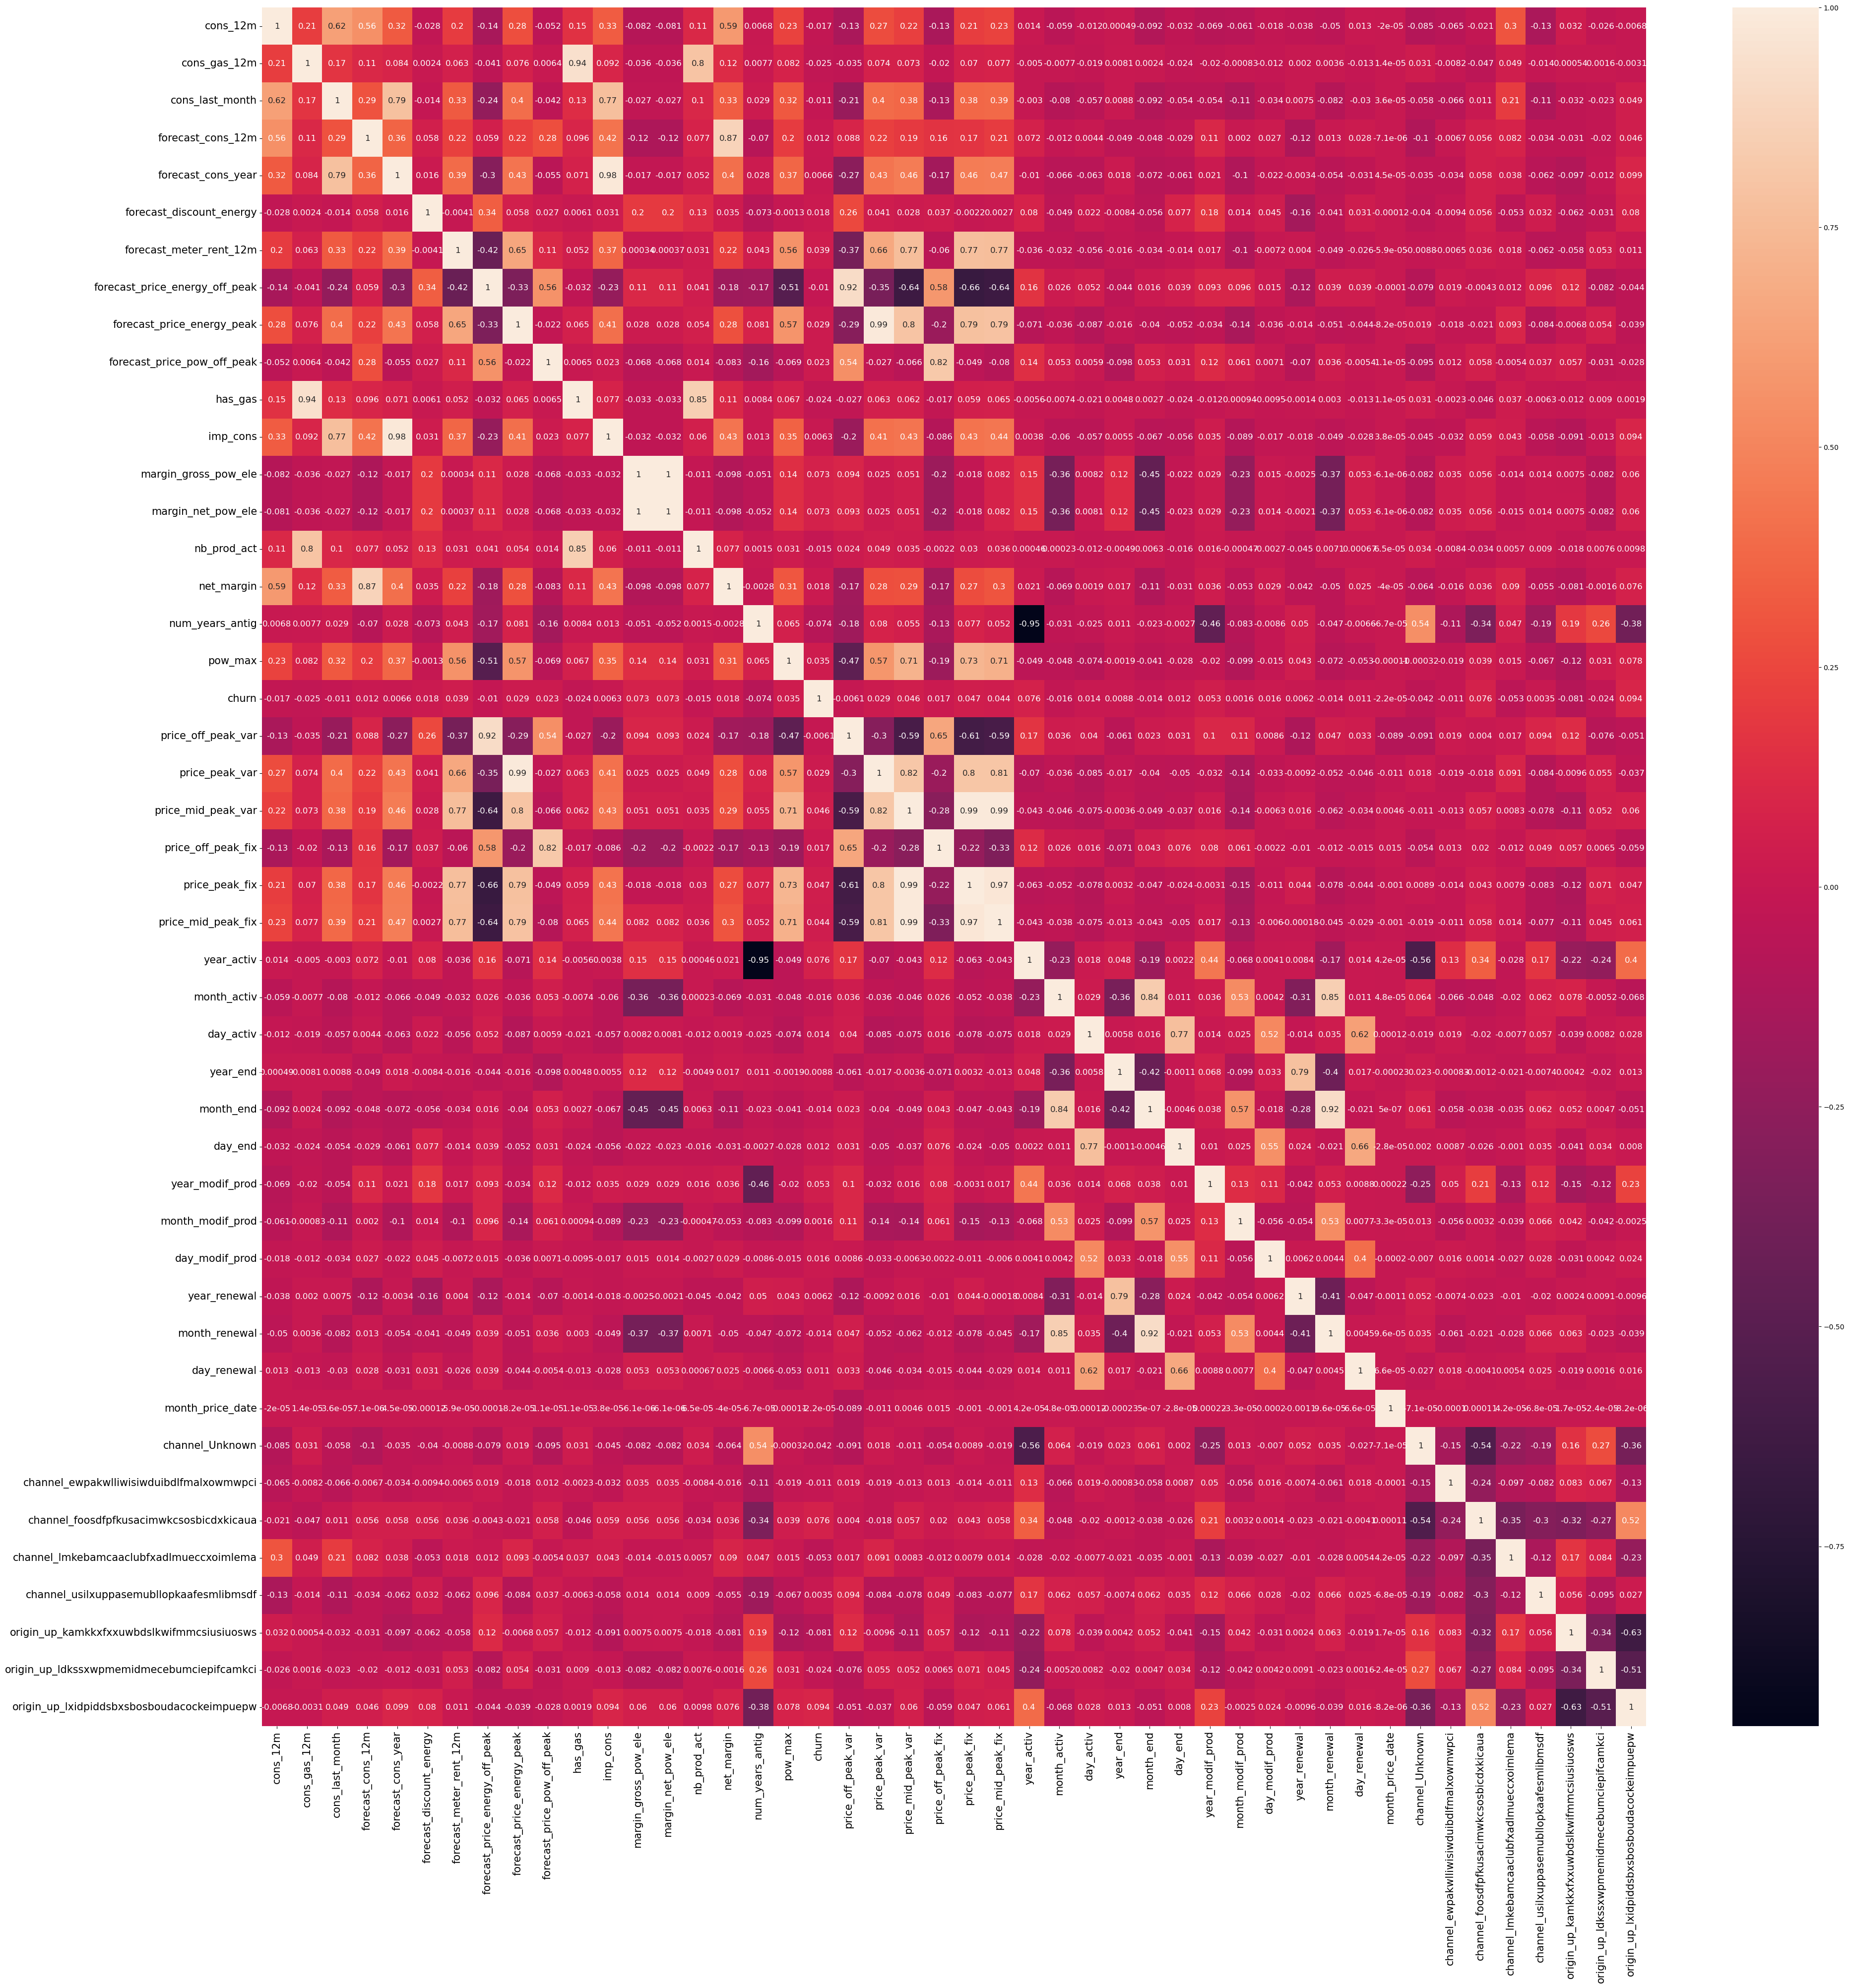

In [54]:
# Calculate the correlation matrix 
correlation = df.corr()

# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [55]:
# List of correlated features to drop (keeping one from each pair)
features_to_drop = [
    'forecast_price_energy_off_peak', 
    'forecast_price_energy_peak', 
    'forecast_price_energy_off_peak', 
    'price_peak_var', 
    'price_off_peak_var', 
    'forecast_cons_year', 
    'forecast_meter_rent_12m', 
    'forecast_price_energy_peak'
]

# Drop the features
df = df.drop(columns=features_to_drop)

# Check the resulting shape after dropping the features
print(f"Shape of the dataframe after dropping highly correlated variables: {df.shape}")

Shape of the dataframe after dropping highly correlated variables: (175149, 40)


In [56]:
df.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0       0.0      4.739944              0.0                0.0   
1       0.0      4.739944              0.0                0.0   
2       0.0      4.739944              0.0                0.0   
3       0.0      4.739944              0.0                0.0   
4       0.0      4.739944              0.0                0.0   

   forecast_discount_energy  forecast_price_pow_off_peak  has_gas  imp_cons  \
0                       0.0                     1.619163        1       0.0   
1                       0.0                     1.619163        1       0.0   
2                       0.0                     1.619163        1       0.0   
3                       0.0                     1.619163        1       0.0   
4                       0.0                     1.619163        1       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  ...  day_renewal  \
0              1.422261            1.422261  ...           23   
1              1.422261            1.422261  ...           23   
2              1.422261            1.422261  ...           23   
3              1.422261            1.422261  ...           23   
4              1.422261            1.422261  ...           23   

   month_price_date  channel_Unknown  \
0                 1            False   
1                 2            False   
2                 3            False   
3                 4            False   
4                 5            False   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                      True   
2                                      True   
3                                      True   
4                                      True   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                        True  
2                                        True  
3                                        True  
4                                        True  

[5 rows x 40 columns]

In [58]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [59]:
# Convert boolean values (True/False) to 1 and 0
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Check the transformation
df.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0       0.0      4.739944              0.0                0.0   
1       0.0      4.739944              0.0                0.0   
2       0.0      4.739944              0.0                0.0   
3       0.0      4.739944              0.0                0.0   
4       0.0      4.739944              0.0                0.0   

   forecast_discount_energy  forecast_price_pow_off_peak  has_gas  imp_cons  \
0                       0.0                     1.619163        1       0.0   
1                       0.0                     1.619163        1       0.0   
2                       0.0                     1.619163        1       0.0   
3                       0.0                     1.619163        1       0.0   
4                       0.0                     1.619163        1       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  ...  day_renewal  \
0              1.422261            1.422261  ...           23   
1              1.422261            1.422261  ...           23   
2              1.422261            1.422261  ...           23   
3              1.422261            1.422261  ...           23   
4              1.422261            1.422261  ...           23   

   month_price_date  channel_Unknown  \
0                 1                0   
1                 2                0   
2                 3                0   
3                 4                0   
4                 5                0   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         1   
2                                         1   
3                                         1   
4                                         1   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           1  

[5 rows x 40 columns]

In [61]:
df.columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_discount_energy', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'churn',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'year_activ', 'month_activ', 'day_activ',
       'year_end', 'month_end', 'day_end', 'year_modif_prod',
       'month_modif_prod', 'day_modif_prod', 'year_renewal', 'month_renewal',
       'day_renewal', 'month_price_date', 'channel_Unknown',
       'channel_ewpakwlliwisiwduibdlfmalxowmwpci',
       'channel_foosdfpfkusacimwkcsosbicdxkicaua',
       'channel_lmkebamcaaclubfxadlmueccxoimlema',
       'channel_usilxuppasemubllopkaafesmlibmsdf',
       'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'origin_up_ldkssxwpmemidmecebumciepifcamkci',
       'origin_up_lxidpiddsbxsbosboudacockeimpuepw'],
   

## Feature Engineering

In [72]:
# Interaction Features (using simple multiplication to capture relationships)
df['price_cons_interaction'] = df['forecast_price_pow_off_peak'] * df['cons_12m']
df['forecast_cons_interaction'] = df['forecast_cons_12m'] * df['cons_12m']

In [74]:
# Aggregated Statistical Features 
df['max_price_energy_off_peak'] = df['forecast_price_pow_off_peak'].max()
df['price_per_unit'] = df['forecast_price_pow_off_peak'] / df['forecast_cons_12m']
df['mean_forecast_price'] = df[['forecast_price_pow_off_peak', 'forecast_price_pow_off_peak']].mean(axis=1)

In [80]:
# Interaction Features (using simple multiplication to capture relationships)
df['price_cons_interaction'] = df['forecast_price_pow_off_peak'] * df['cons_12m']
df['forecast_cons_interaction'] = df['forecast_cons_12m'] * df['cons_12m']
df['price_cons_churn_interaction'] = df['forecast_price_pow_off_peak'] * df['churn']

In [64]:
churn_distribution = df['churn'].value_counts()
churn_distribution

churn
0    158146
1     17003
Name: count, dtype: int64

In [101]:
# Basic Model Feature Set
features_basic = [
    'cons_12m', 'forecast_cons_12m', 'forecast_price_pow_off_peak',
    'imp_cons', 'has_gas', 'forecast_discount_energy', 'margin_gross_pow_ele', 'margin_net_pow_ele',
    'nb_prod_act', 'net_margin', 'pow_max'
]


# Feature Set 2: Basic + Price and Consumption Features
features_price_cons = features_basic + ['price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 
                                       'price_mid_peak_fix', 'cons_last_month']

# Feature Set 3: Basic + Price + Consumption + Time-Based Features
features_time_based = features_price_cons + ['year_activ', 'month_activ', 'day_activ', 'year_end', 'month_end', 
                                             'day_end', 'year_modif_prod', 'month_modif_prod', 'day_modif_prod', 
                                             'year_renewal', 'month_renewal', 'day_renewal', 'month_price_date']

# Feature Set 4: Basic + Price + Consumption + Time-Based + Categorical Features
features_categorical = features_time_based + ['channel_Unknown', 'channel_ewpakwlliwisiwduibdlfmalxowmwpci', 
                                              'channel_foosdfpfkusacimwkcsosbicdxkicaua', 
                                              'channel_lmkebamcaaclubfxadlmueccxoimlema', 
                                              'channel_usilxuppasemubllopkaafesmlibmsdf', 
                                              'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws', 
                                              'origin_up_ldkssxwpmemidmecebumciepifcamkci', 
                                              'origin_up_lxidpiddsbxsbosboudacockeimpuepw']

# Feature Set 5: Basic + Price + Consumption + Time-Based + Categorical + Interaction Features
features_interaction = features_categorical + ['price_cons_interaction', 'forecast_cons_interaction', 'price_cons_churn_interaction']

# # Feature Set 6: Basic + Price + Consumption + Time-Based + Categorical + Interaction + Aggregated Features
# features_aggregated = features_interaction + [ 'max_price_energy_off_peak', 
#                                               'price_per_unit', 'mean_forecast_price']

# # Feature Set 7: Complete Feature Set (All Features Combined)
# final_feature_set = features_basic + features_price_cons + features_time_based + features_categorical + features_interaction + features_aggregated


In [85]:
# Extract features (X) and target (y)
X = df[features_basic]  # Feature Set 1
y = df['churn']  # Target variable

In [86]:
#Train/Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Evaluate the model
y_pred = rf_model.predict(X_test)

# Function to evaluate model
def evaluate_model(y_test, y_pred):
    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'ROC-AUC Score: {roc_auc}')
    
    # Confusion Matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Evaluate Random Forest Model for Feature Set
evaluate_model(y_test, y_pred)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31705
           1       1.00      1.00      1.00      3325

    accuracy                           1.00     35030
   macro avg       1.00      1.00      1.00     35030
weighted avg       1.00      1.00      1.00     35030

ROC-AUC Score: 0.9999684592335594
Confusion Matrix:
 [[31703     2]
 [    0  3325]]


In [89]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [90]:
X = df[features_price_cons]  # Feature Set 2
y = df['churn']  # Target variable

In [91]:
#Train/Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Evaluate the model
y_pred = rf_model.predict(X_test)

# Function to evaluate model
def evaluate_model(y_test, y_pred):
    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'ROC-AUC Score: {roc_auc}')
    
    # Confusion Matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Evaluate Random Forest Model for Feature Set
evaluate_model(y_test, y_pred)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31705
           1       1.00      0.99      1.00      3325

    accuracy                           1.00     35030
   macro avg       1.00      1.00      1.00     35030
weighted avg       1.00      1.00      1.00     35030

ROC-AUC Score: 0.9958609977079584
Confusion Matrix:
 [[31700     5]
 [   27  3298]]


In [92]:
X = df[features_time_based]  # Feature Set 3
y = df['churn']  # Target variable

In [93]:
#Train/Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Evaluate the model
y_pred = rf_model.predict(X_test)

# Function to evaluate model
def evaluate_model(y_test, y_pred):
    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'ROC-AUC Score: {roc_auc}')
    
    # Confusion Matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Evaluate Random Forest Model for Feature Set
evaluate_model(y_test, y_pred)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     31705
           1       1.00      0.95      0.97      3325

    accuracy                           0.99     35030
   macro avg       1.00      0.97      0.98     35030
weighted avg       0.99      0.99      0.99     35030

ROC-AUC Score: 0.9730827067669172
Confusion Matrix:
 [[31705     0]
 [  179  3146]]


In [94]:
X = df[features_categorical]  # Feature Set 4
y = df['churn']  # Target variable

In [95]:
#Train/Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Evaluate the model
y_pred = rf_model.predict(X_test)

# Function to evaluate model
def evaluate_model(y_test, y_pred):
    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'ROC-AUC Score: {roc_auc}')
    
    # Confusion Matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Evaluate Random Forest Model for Feature Set
evaluate_model(y_test, y_pred)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     31705
           1       1.00      0.95      0.97      3325

    accuracy                           1.00     35030
   macro avg       1.00      0.98      0.99     35030
weighted avg       1.00      1.00      1.00     35030

ROC-AUC Score: 0.9753383458646616
Confusion Matrix:
 [[31705     0]
 [  164  3161]]


In [98]:
X = df[features_interaction]  # Feature Set 5
y = df['churn']  # Target variable

In [99]:
#Train/Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Evaluate the model
y_pred = rf_model.predict(X_test)

# Function to evaluate model
def evaluate_model(y_test, y_pred):
    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'ROC-AUC Score: {roc_auc}')
    
    # Confusion Matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Evaluate Random Forest Model for Feature Set
evaluate_model(y_test, y_pred)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31705
           1       1.00      1.00      1.00      3325

    accuracy                           1.00     35030
   macro avg       1.00      1.00      1.00     35030
weighted avg       1.00      1.00      1.00     35030

ROC-AUC Score: 1.0
Confusion Matrix:
 [[31705     0]
 [    0  3325]]


# Cross Validation

In [107]:
# Define Feature Set 5
X = df[features_interaction]  # Use Feature Set 5 (final feature set)
y = df['churn']  # Target variable

# Train/Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Evaluate the model on the test data
y_pred = rf_model.predict(X_test)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {roc_auc}')

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#  Check for Overfitting by comparing training and testing accuracy
train_accuracy = rf_model.score(X_train_res, y_train_res)
test_accuracy = rf_model.score(X_test, y_test)
print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

# Perform Cross-Validation (5-fold cross-validation)
cross_val_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores: ", cross_val_scores)
print(f'Mean Cross-Validation Accuracy: {cross_val_scores.mean()}')


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31705
           1       1.00      1.00      1.00      3325

    accuracy                           1.00     35030
   macro avg       1.00      1.00      1.00     35030
weighted avg       1.00      1.00      1.00     35030

ROC-AUC Score: 1.0
Confusion Matrix:
 [[31705     0]
 [    0  3325]]
Training Accuracy: 1.0
Test Accuracy: 1.0
Cross-Validation Accuracy Scores:  [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0


In [108]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to hold the feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by their importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top important features
print("Top 10 Important Features:\n", feature_importance_df.head(10))


Top 10 Important Features:
                                        Feature  Importance
39                price_cons_churn_interaction    0.845646
6                         margin_gross_pow_ele    0.014633
7                           margin_net_pow_ele    0.014022
0                                     cons_12m    0.009391
37                      price_cons_interaction    0.007926
28                            month_price_date    0.007384
15                             cons_last_month    0.007351
34  origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws    0.007158
10                                     pow_max    0.005841
9                                   net_margin    0.005785
